# **Análise exploratória**

## **Importando os dados**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("sample_data/casas_aluguel.csv")

In [3]:
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


Verificando se há dados nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Vemos que na coluna "floor" não há dados nulos, mas foi preenchido por "-" nos espaços vazios. Vamos transformar em "NaN" para um melhor tratamento na criação dos modelos.

In [ ]:
df["floor"].value_counts()

-      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
25       25
23       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
35        1
46        1
301       1
51        1
Name: floor, dtype: int64

In [4]:
df["floor"].replace("-", np.nan, inplace=True)

Verificamos que os valores da coluna "floor" está em string, vamos transforma-la em valores inteiros, pois se trata de números, mas antes vamos retirar os valores nulos que não nos interessam neste momento, ele será tratado posteriormente na criação do modelo de machine learning.

In [5]:
df = df.dropna()

In [6]:
lista = []
for num in df["floor"]:
    num2 = int(num)
    lista.append(num2)
    
df["floor"] = lista
df["floor"]

0         7
1        20
2         6
3         2
4         1
         ..
10686     8
10687     5
10688    17
10689     8
10690     8
Name: floor, Length: 8231, dtype: int64

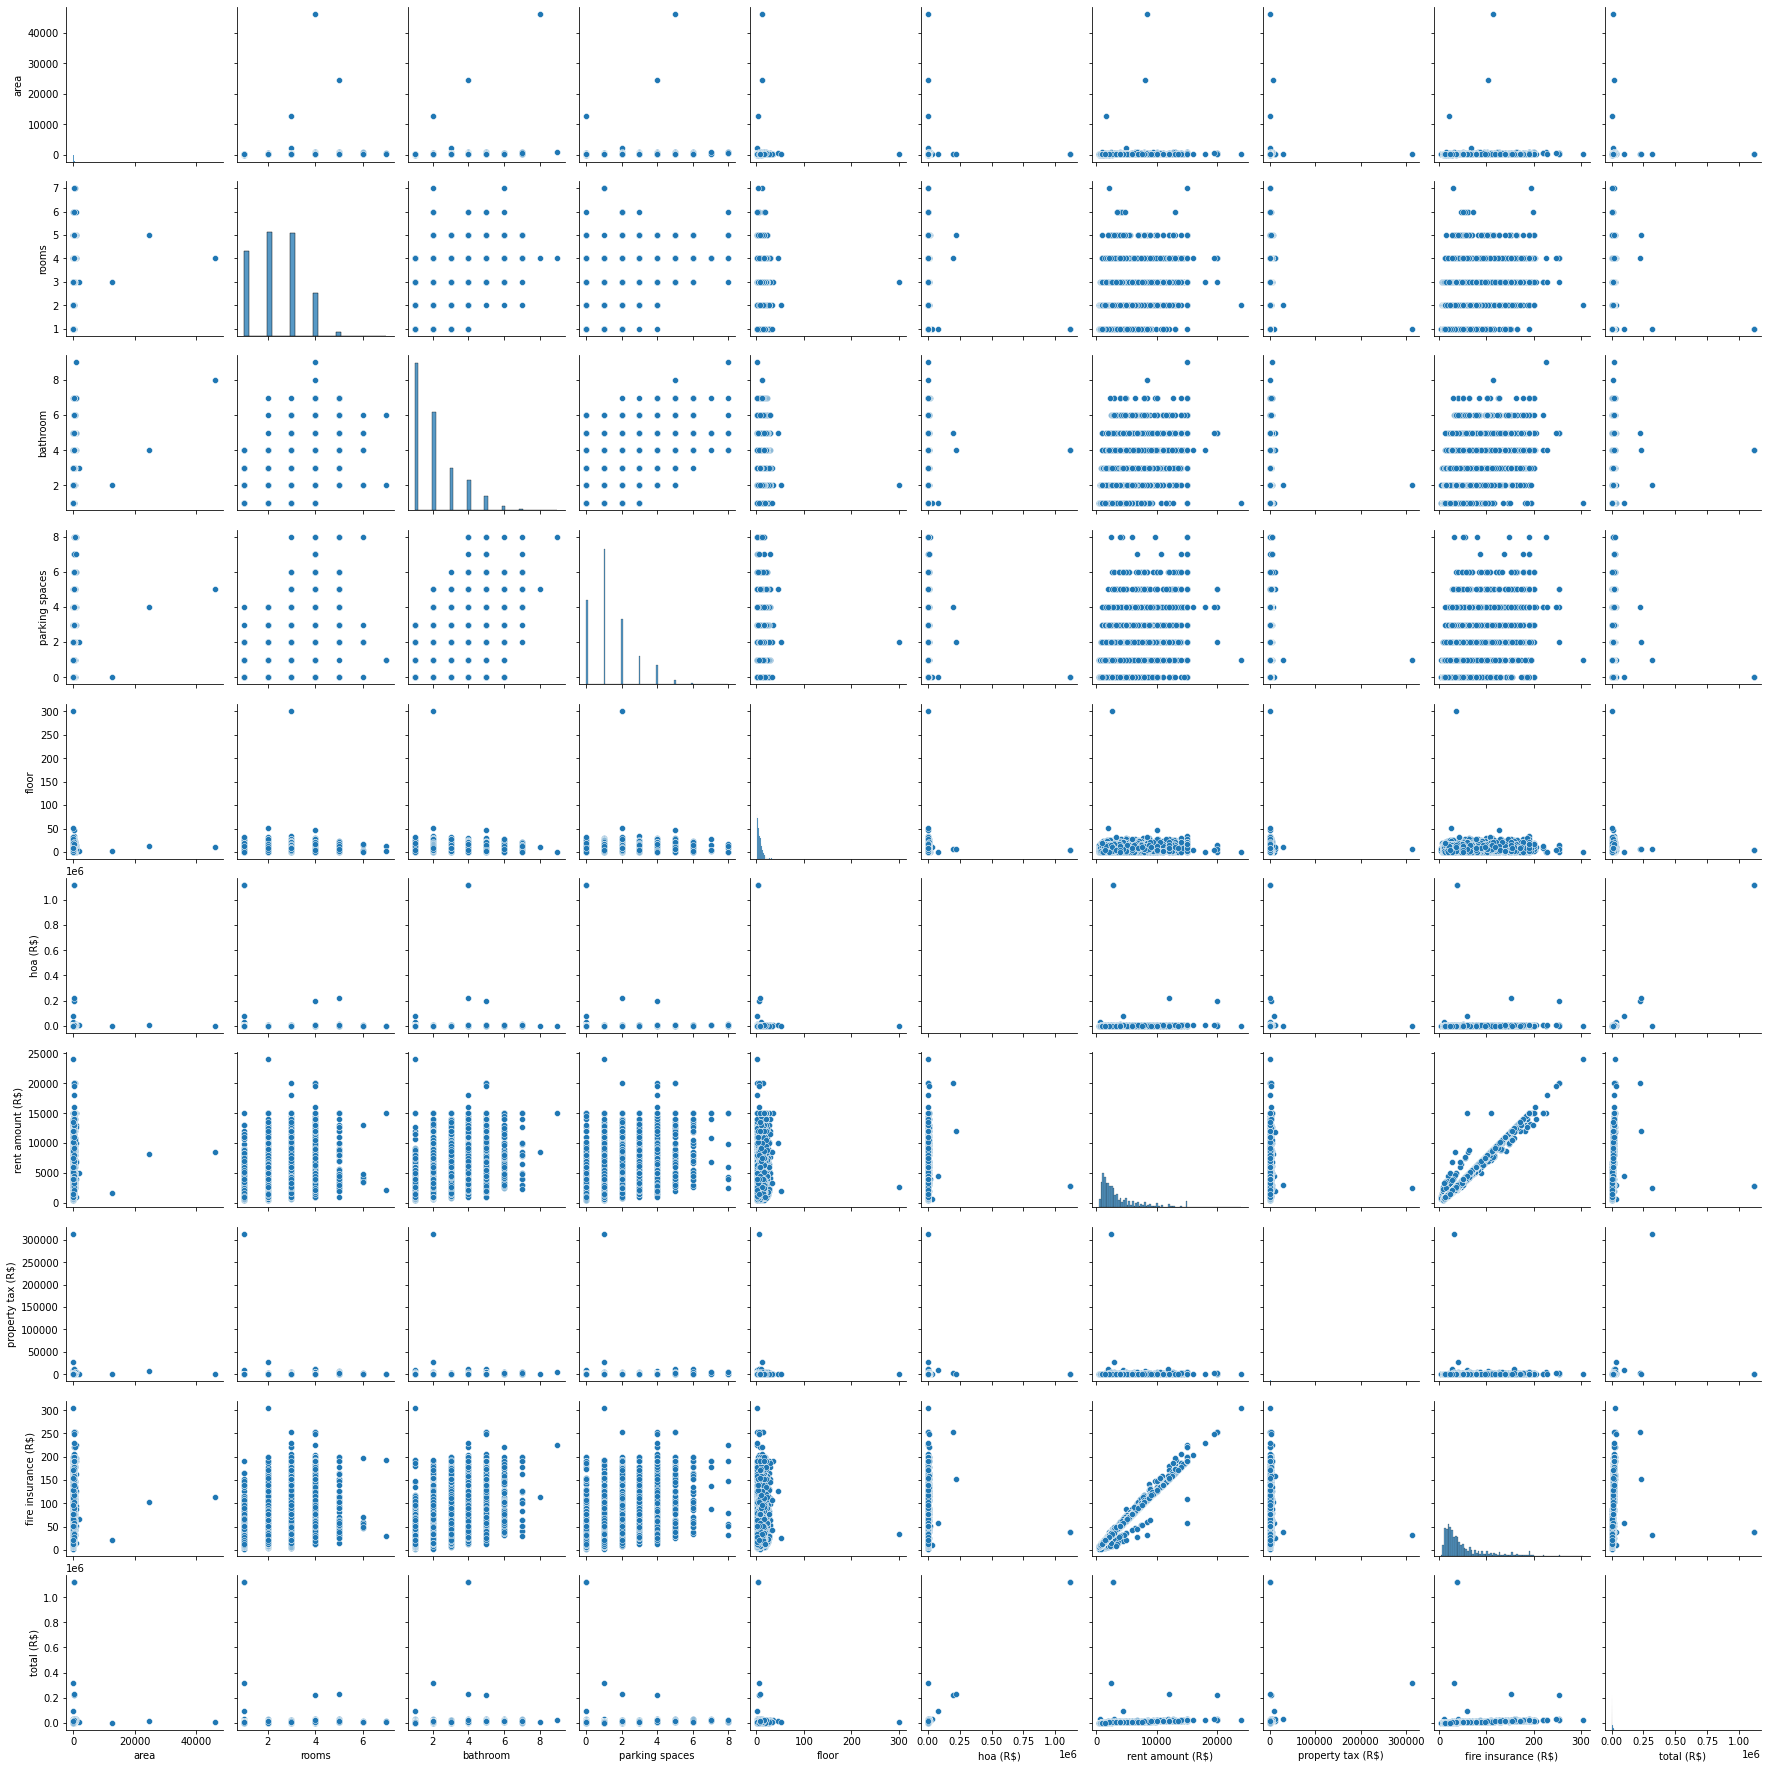

In [9]:
sns.pairplot(df);

## **Analisando estatísticamente o Target**

### **Correlação:**

In [58]:
df.corr()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.143360,0.177147,0.143952,0.029293,0.009582,0.126287,0.026752,0.127733,0.035762
rooms,0.143360,1.000000,0.724837,0.630170,0.055558,0.020393,0.483813,0.060160,0.487009,0.113443
bathroom,0.177147,0.724837,1.000000,0.742953,0.157266,0.072874,0.646189,0.094584,0.645273,0.197737
parking spaces,0.143952,0.630170,0.742953,1.000000,0.177510,0.027586,0.580138,0.090066,0.579047,0.142391
floor,0.029293,0.055558,0.157266,0.177510,1.000000,0.003632,0.209447,0.021005,0.203213,0.043181
hoa (R$),0.009582,0.020393,0.072874,0.027586,0.003632,1.000000,0.050915,0.007914,0.050964,0.964333
rent amount (R$),0.126287,0.483813,0.646189,0.580138,0.209447,0.050915,1.000000,0.083720,0.995430,0.235151
property tax (R$),0.026752,0.060160,0.094584,0.090066,0.021005,0.007914,0.083720,1.000000,0.083080,0.210545
fire insurance (R$),0.127733,0.487009,0.645273,0.579047,0.203213,0.050964,0.995430,0.083080,1.000000,0.234315
total (R$),0.035762,0.113443,0.197737,0.142391,0.043181,0.964333,0.235151,0.210545,0.234315,1.000000


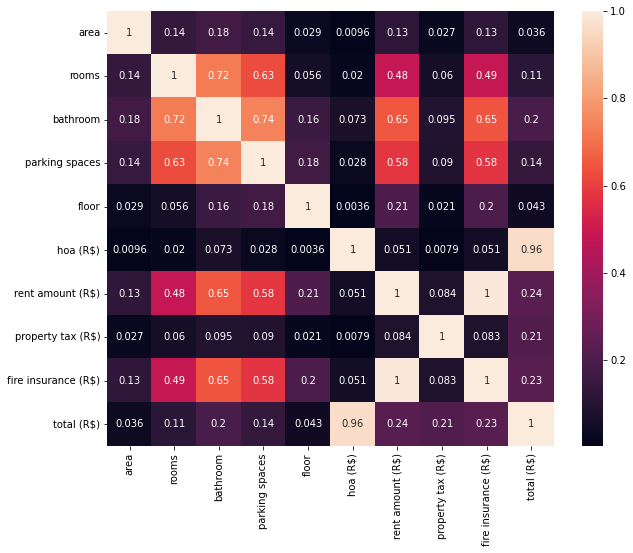

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

### **Percebe-se abaixo que os valores dos outliers são extremamente desproporcionais:**

In [30]:
df_target = df["total (R$)"]
df_target = pd.DataFrame(df_target)
df_target

,total (R$)
0,5618
1,7973
2,3841
3,1421
4,836
...,...
10686,13670
10687,1926
10688,19260
10689,7390


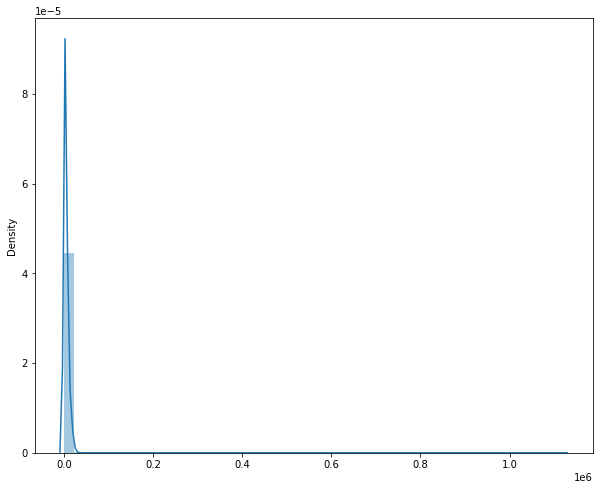

In [27]:
plt.figure(figsize=(10,8))
sns.distplot(df_target);

### **Avaliando os quartis:**

In [40]:

Q1 = df_target["total (R$)"].quantile(q=0.25) # Primeiro quartil
Q2 = df_target["total (R$)"].quantile(q=0.50) # Segundo quartil
Q3 = df_target["total (R$)"].quantile(q=0.75) # Terceiro quartil

IQR = Q3 - Q1 # Intervalo interquartílico
inf = Q1 - 1.5 * IQR
sup = Q3 + 1.5 * IQR
media = df_target["total (R$)"].mean()
mediana = df_target["total (R$)"].median()
moda = df_target["total (R$)"].value_counts().index[0]

print(f"Primeiro quartil: {Q1}")
print(f"Segundo quartil: {Q2}")
print(f"Terceiro quartil: {Q3}")
print(f"Intervalo interquartílico: {IQR}")
print(f"Limite superior: {sup}")
print(f"Limite inferior: {inf}")
print(f"Média geral: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda-Valor mais frequente: {moda:.2f}")


Primeiro quartil: 2079.0
Segundo quartil: 3456.0
Terceiro quartil: 6394.0
Intervalo interquartílico: 4315.0
Limite superior: 12866.5
Limite inferior: -4393.5
Média geral: 5458.47
Mediana: 3456.00
Moda-Valor mais frequente: 2555.00


### **Retirando alguns Outliers para melhor visualização dos gráficos:**

In [49]:
df_target_so = pd.DataFrame()
df_target_so["total (R$)"] = df_target[df_target["total (R$)"] < 11000]

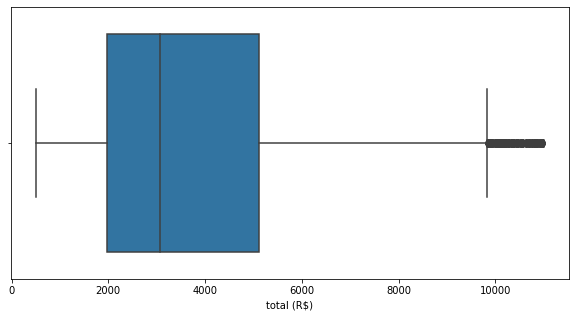

In [50]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_target_so, x="total (R$)");

### **Assimetria positiva =>  moda <= mediana <= média**

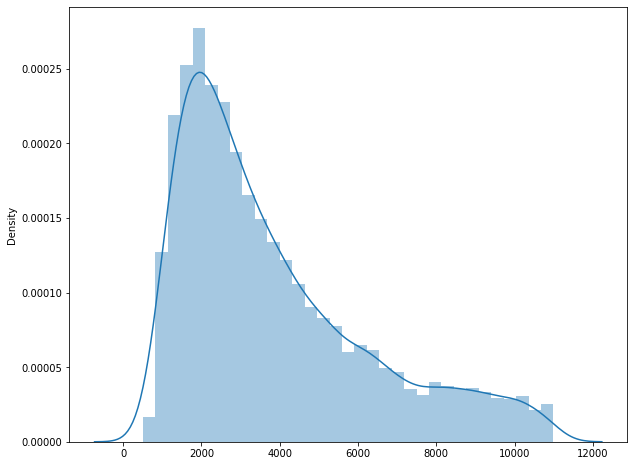

In [51]:
plt.figure(figsize=(10,8))
sns.distplot(df_target_so);

### **Avaliando a medida de curtose:**

**Para valores abaixo de 0.263 => Mesmo com os grandes quantidades e valores dos outliers o resultado identificou como Leptocúrtica, mostrando que a maioria dos seus dados se dá em torno do seu centro:**

In [53]:
Q10 = df_target["total (R$)"].quantile(q=0.1) # Décimo quartil
Q90 = df_target["total (R$)"].quantile(q=0.9) # Nonagésimo quartil
(Q3-Q1)/(2*(Q90-Q10))

0.21674703636728954

In [57]:
df_target["total (R$)"].kurtosis()

3139.7948535480973

## **Verificando e retirando as Outliers para melhor vizualização | Todas as Features**

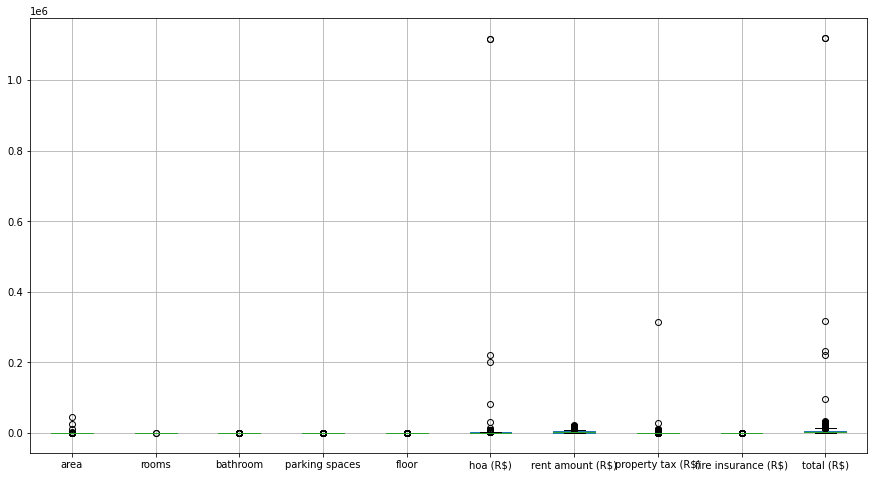

In [60]:
plt.figure(figsize=(15,8))
df.boxplot();

In [73]:
def calc_min_and_max_range(dados_coluna):
    Q1 = dados_coluna.quantile(q=0.25) # Primeiro quartil
    Q3 = dados_coluna.quantile(q=0.75) # Terceiro quartil

    IQR = Q3 - Q1 # Intervalo interquartílico

    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR

    return inf, sup

In [74]:
columns_to_remove_outliers = ['area', 'hoa (R$)', 'property tax (R$)', 'total (R$)']

for coluna in columns_to_remove_outliers:
    inf, sup = calc_min_and_max_range(df[coluna])
    
    # Filtro para pegar apenas as linhas cujos dados estão dentro do intervalo aceitável (não outliers)
    df = df[(df[coluna] > inf) & (df[coluna] < sup)]

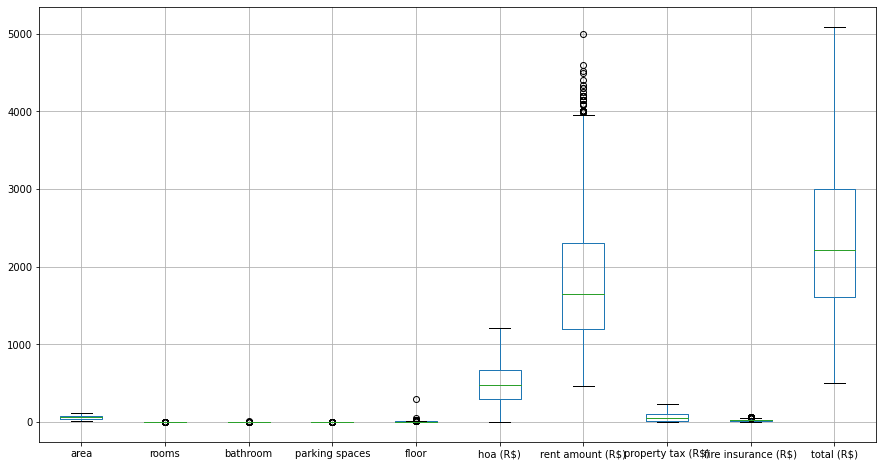

In [75]:
plt.figure(figsize=(15,8))
df.boxplot();

## **Cidade x Valor total do aluguel - Estatística básica**

Distribuição dos valores de alugueis nas 5 cidades

**Vamos primeiro pegar uma estatística básica com todas as cidades:**

Primeiro quartil: 1615.0
Segundo quartil: 2222.0
Terceiro quartil: 3007.0
Intervalo interquartílico: 1392.0
Limite superior: 5095.0
Limite inferior: -473.0
Média geral: 2385.89
Mediana: 2222.00
Moda-Valor mais frequente: 2555.00


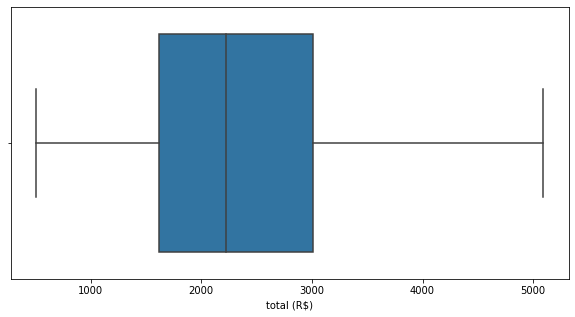

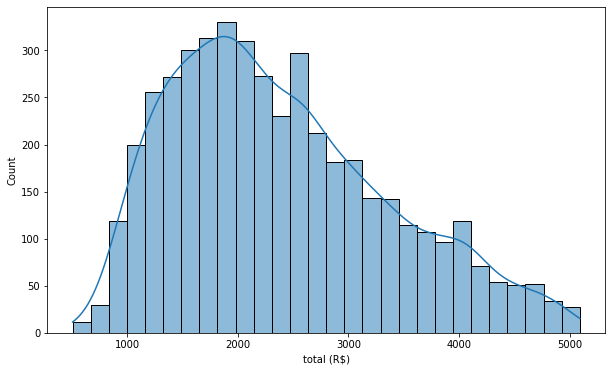

In [76]:

plt.figure(figsize=(10,5))
sns.boxplot(x=df["total (R$)"]);

Q1 = df["total (R$)"].quantile(q=0.25) # Primeiro quartil
Q2 = df["total (R$)"].quantile(q=0.50) # Segundo quartil
Q3 = df["total (R$)"].quantile(q=0.75) # Terceiro quartil

IQR = Q3 - Q1 # Intervalo interquartílico
inf = Q1 - 1.5 * IQR
sup = Q3 + 1.5 * IQR
media = df["total (R$)"].mean()
mediana = df["total (R$)"].median()
moda = pd.DataFrame(df["total (R$)"].value_counts()).index[0]

print(f"Primeiro quartil: {Q1}")
print(f"Segundo quartil: {Q2}")
print(f"Terceiro quartil: {Q3}")
print(f"Intervalo interquartílico: {IQR}")
print(f"Limite superior: {sup}")
print(f"Limite inferior: {inf}")
print(f"Média geral: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda-Valor mais frequente: {moda:.2f}")

plt.figure(figsize=(10, 6))
sns.histplot(df["total (R$)"], kde=True)  


**Agora vamos analisar por cidade:**

In [77]:
def cidades_taxas(cidade):
      cidade_incendio = df[df["city"] == cidade]
      print()
      plt.figure(figsize=(10,5))
      sns.boxplot(x=cidade_incendio["total (R$)"])
      plt.title(cidade);
      print()

      Q1 = cidade_incendio["total (R$)"].quantile(q=0.25) # Primeiro quartil
      Q2 = cidade_incendio["total (R$)"].quantile(q=0.50) # Segundo quartil
      Q3 = cidade_incendio["total (R$)"].quantile(q=0.75) # Terceiro quartil
      print()
      print("====================")
      print(f"Cidade de {cidade}")
      print("====================")
      IQR = Q3 - Q1 # Intervalo interquartílico
      inf = Q1 - 1.5 * IQR
      sup = Q3 + 1.5 * IQR
      media = cidade_incendio["total (R$)"].mean()
      mediana = cidade_incendio["total (R$)"].median()
      moda = pd.DataFrame(cidade_incendio["total (R$)"].value_counts()).index[0]

      print(f"Primeiro quartil: {Q1}")
      print(f"Segundo quartil: {Q2}")
      print(f"Terceiro quartil: {Q3}")
      print(f"Intervalo interquartílico: {IQR}")
      print(f"Limite superior: {sup}")
      print(f"Limite inferior: {inf}")
      print(f"Média geral: {media:.2f}")
      print(f"Mediana: {mediana:.2f}")
      print(f"Moda-Valor mais frequente: {moda:.2f}")
      print()
      plt.figure(figsize=(30,6))
      sns.histplot(cidade_incendio["total (R$)"], kde=True)
      plt.title("Frequência dos valores do preço do aluguel")
      print()

**São Paulo**




Cidade de São Paulo
Primeiro quartil: 2047.5
Segundo quartil: 2623.0
Terceiro quartil: 3479.0
Intervalo interquartílico: 1431.5
Limite superior: 5626.25
Limite inferior: -99.75
Média geral: 2769.58
Mediana: 2623.00
Moda-Valor mais frequente: 2555.00




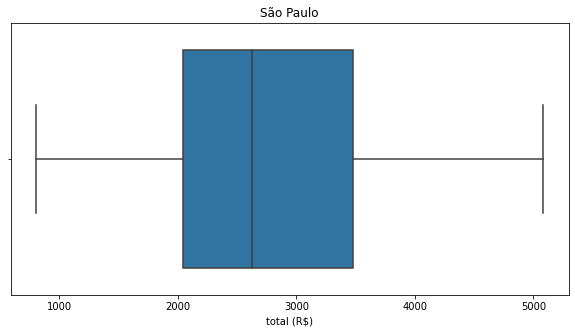

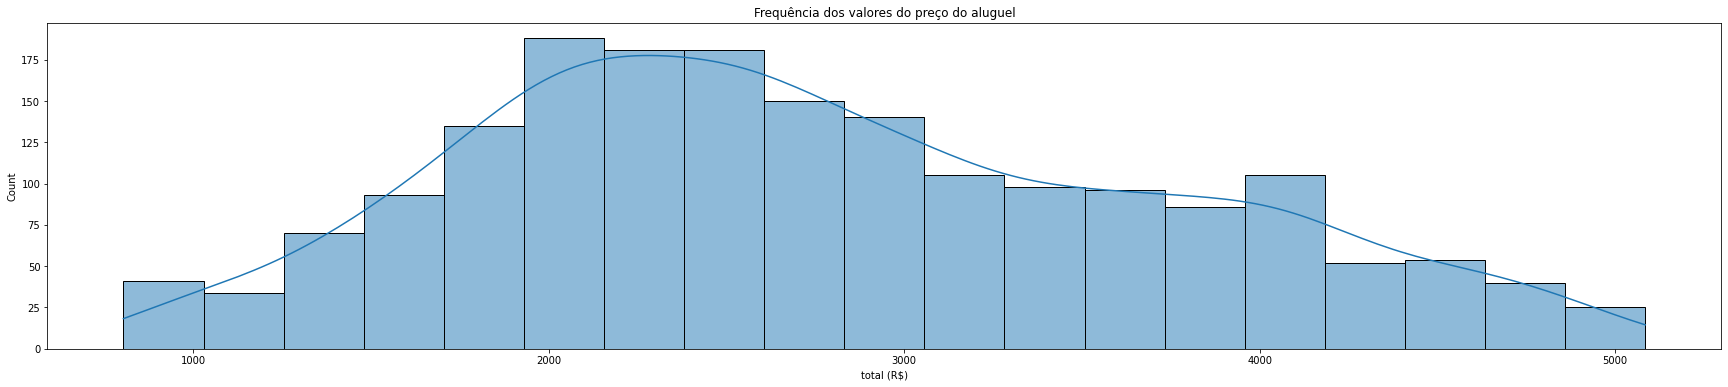

In [78]:
cidades_taxas("São Paulo")

**Rio de Janeiro**




Cidade de Rio de Janeiro
Primeiro quartil: 1792.0
Segundo quartil: 2300.0
Terceiro quartil: 3036.0
Intervalo interquartílico: 1244.0
Limite superior: 4902.0
Limite inferior: -74.0
Média geral: 2469.35
Mediana: 2300.00
Moda-Valor mais frequente: 1859.00




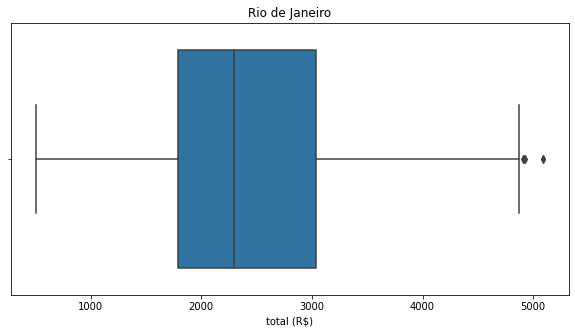

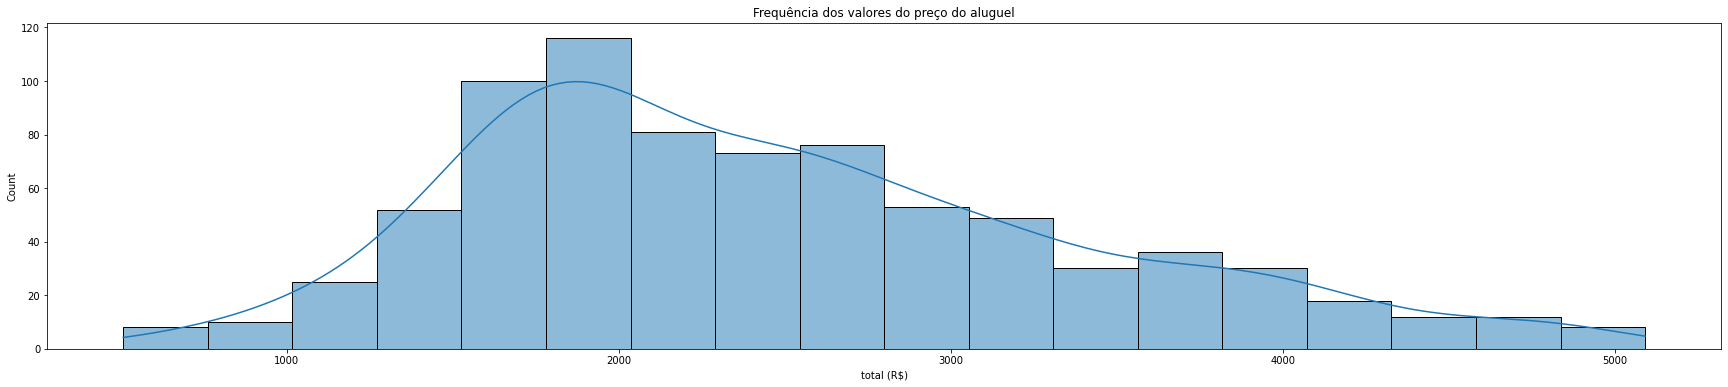

In [79]:
cidades_taxas("Rio de Janeiro")

**Belo Horizonte**




Cidade de Belo Horizonte
Primeiro quartil: 1293.5
Segundo quartil: 1670.0
Terceiro quartil: 2198.5
Intervalo interquartílico: 905.0
Limite superior: 3556.0
Limite inferior: -64.0
Média geral: 1871.83
Mediana: 1670.00
Moda-Valor mais frequente: 3294.00




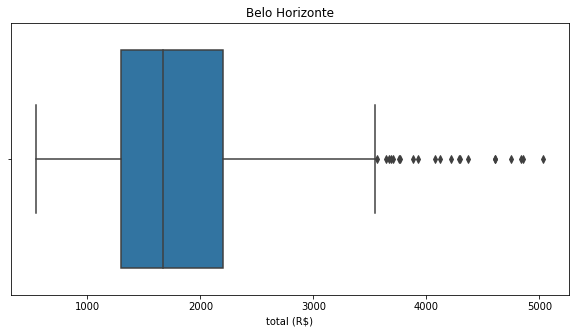

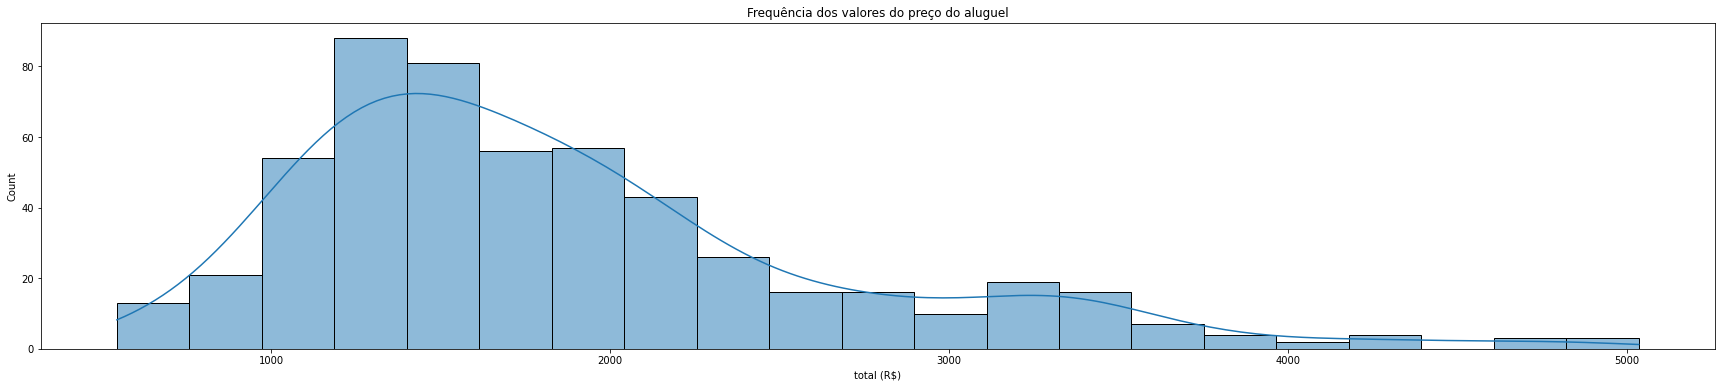

In [80]:
cidades_taxas("Belo Horizonte")

**Porto Alegre**




Cidade de Porto Alegre
Primeiro quartil: 1388.0
Segundo quartil: 1859.0
Terceiro quartil: 2633.0
Intervalo interquartílico: 1245.0
Limite superior: 4500.5
Limite inferior: -479.5
Média geral: 2074.87
Mediana: 1859.00
Moda-Valor mais frequente: 2633.00




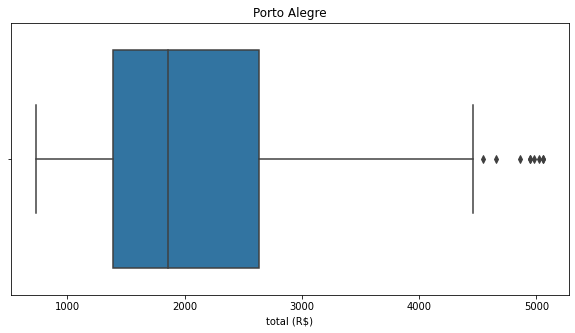

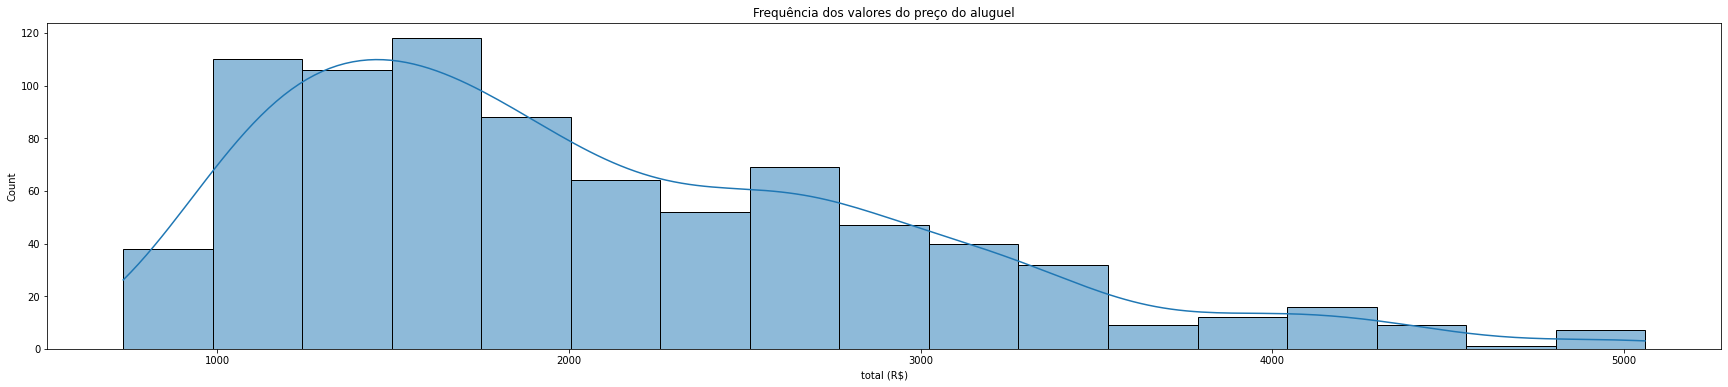

In [81]:
cidades_taxas("Porto Alegre")

**Campinas**




Cidade de Campinas
Primeiro quartil: 1276.0
Segundo quartil: 1684.0
Terceiro quartil: 2313.0
Intervalo interquartílico: 1037.0
Limite superior: 3868.5
Limite inferior: -279.5
Média geral: 1888.06
Mediana: 1684.00
Moda-Valor mais frequente: 1327.00




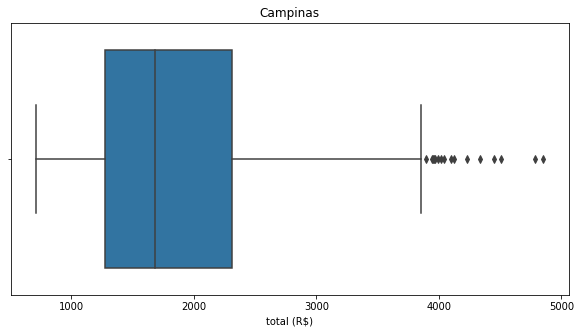

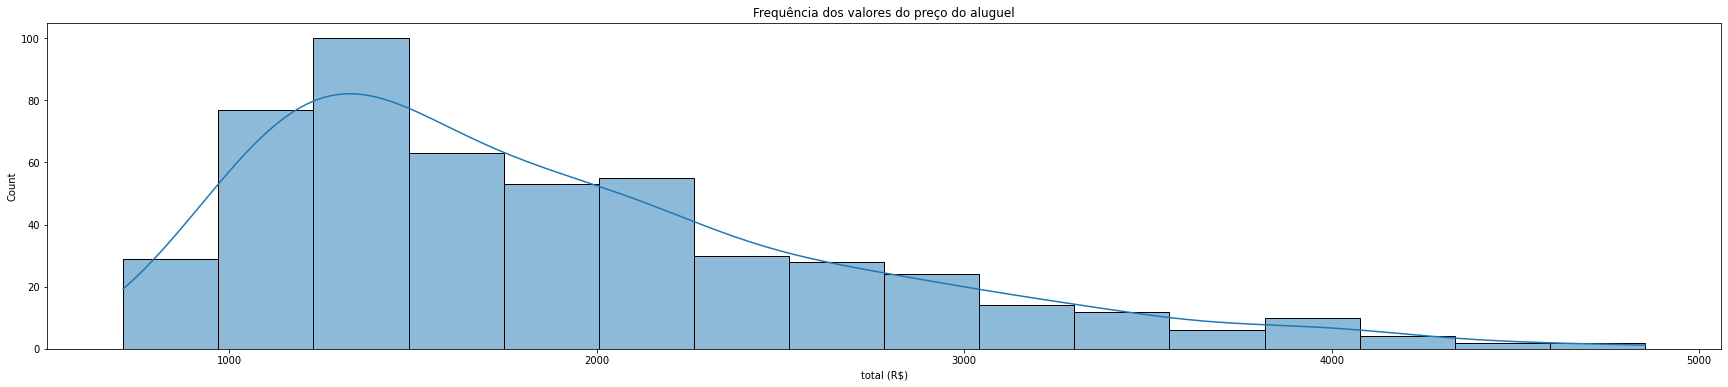

In [82]:
cidades_taxas("Campinas")

##**Ranking dos imóveis de aluguéis mais caros com suas informações gerais**

In [ ]:
more_expensive_all = df
more_expensive_all.sort_values(by="total (R$)", ascending=False)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
3346,Rio de Janeiro,71,2,2,1,13,not acept,furnished,2438,5500,246,71,8255
4653,São Paulo,165,3,3,2,3,acept,furnished,1663,6000,502,77,8242
9112,São Paulo,130,3,2,2,8,acept,not furnished,1310,6500,338,83,8231
4192,São Paulo,115,4,3,4,1,acept,furnished,1133,7000,0,89,8222
603,Campinas,214,3,3,2,1,acept,not furnished,2016,5900,227,75,8218
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,Belo Horizonte,30,1,1,0,2,acept,not furnished,0,525,25,7,557
4294,Belo Horizonte,20,1,1,0,1,not acept,not furnished,0,500,42,7,549
10218,Belo Horizonte,25,1,1,1,1,not acept,not furnished,0,500,38,7,545
9317,Rio de Janeiro,30,1,1,1,3,acept,not furnished,0,500,0,7,507


##**Média geral de preço dos imóveis por cada cidade.**

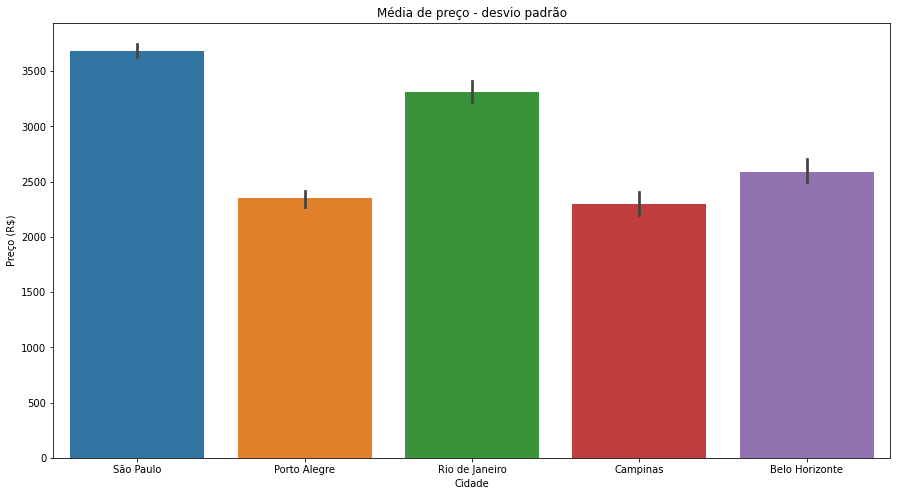

In [ ]:
plt.figure(figsize=(15, 8))

sns.barplot(data=df, y="total (R$)", x="city")
plt.title("Média de preço - desvio padrão")
plt.xlabel("Cidade")
plt.ylabel("Preço (R$)"); 

##**Volume de imóveis de cada cidade pelo preço**

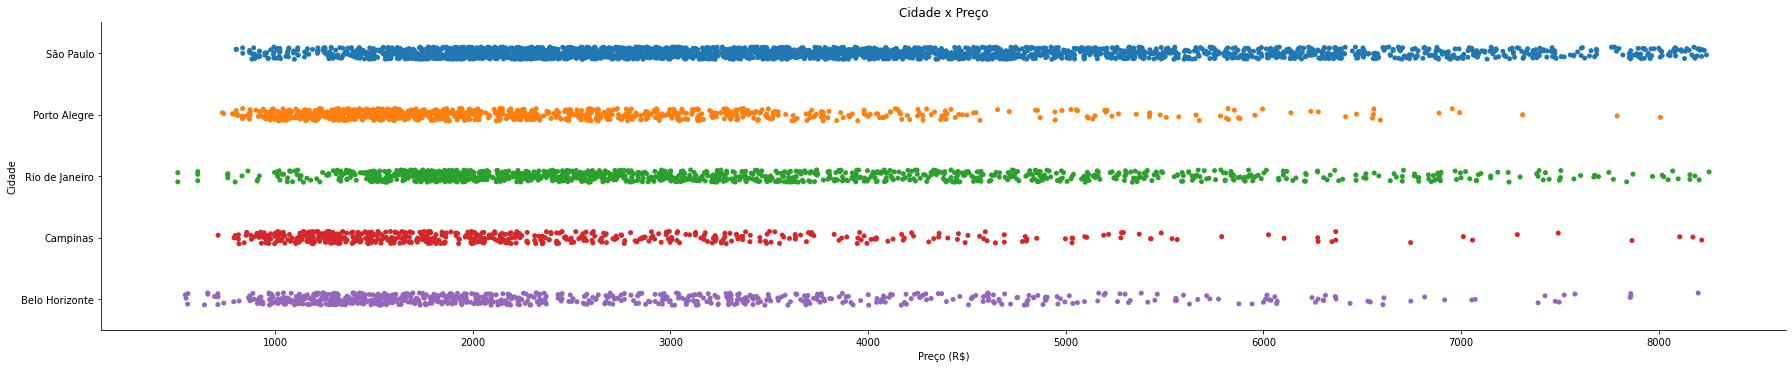

In [ ]:
sns.catplot(data=df, x="total (R$)", y="city", height=5, aspect=5)
plt.title("Cidade x Preço")
plt.xlabel("Preço (R$)")
plt.ylabel("Cidade");

Vamos apenas tomar um exemplo:

##**Número de imóveis existentes igual ou acima dos R$ 6.000,00.**

In [ ]:
acima_seisMil = df[df["total (R$)"] >= 6000]["city"]
acima_seisMil = pd.DataFrame(acima_seisMil)
acima_seisMil.value_counts()

city          
São Paulo         355
Rio de Janeiro     97
Belo Horizonte     36
Campinas           16
Porto Alegre       15
dtype: int64

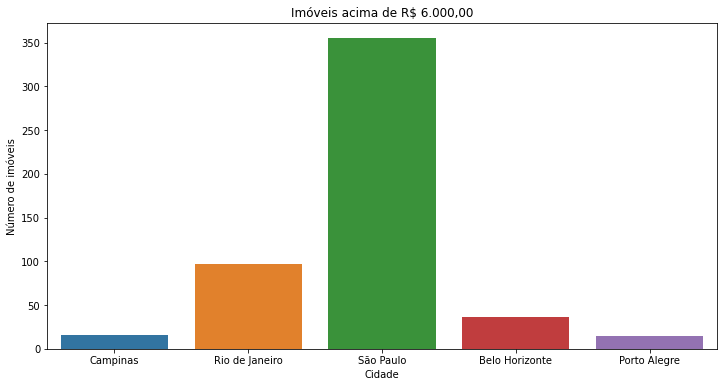

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=acima_seisMil, x="city")
plt.title("Imóveis acima de R$ 6.000,00")
plt.xlabel("Cidade")
plt.ylabel("Número de imóveis");

In [ ]:
sp = (len(acima_seisMil[acima_seisMil["city"] == "São Paulo"]["city"])/len(df[df["city"] == "São Paulo"]["city"]))*100
rj = (len(acima_seisMil[acima_seisMil["city"] == "Rio de Janeiro"]["city"])/len(df[df["city"] == "Rio de Janeiro"]["city"]))*100
bh = (len(acima_seisMil[acima_seisMil["city"] == "Belo Horizonte"]["city"])/len(df[df["city"] == "Belo Horizonte"]["city"]))*100
poa = (len(acima_seisMil[acima_seisMil["city"] == "Porto Alegre"]["city"])/len(df[df["city"] == "Porto Alegre"]["city"]))*100
cp = (len(acima_seisMil[acima_seisMil["city"] == "Campinas"]["city"])/len(df[df["city"] == "Campinas"]["city"]))*100

In [ ]:
ordem = [sp, rj, bh, poa, cp]
ordem.sort( reverse=True)

In [ ]:
tabela_maisCaros = pd.DataFrame()
tabela_maisCaros["city"] = ["São Paulo", "Belo Horizonte", "Rio de Janeiro", "Campinas", "Porto Alegre"]
tabela_maisCaros["Porcentagem (%)"] = ordem

Em porcentagem:

In [ ]:
tabela_maisCaros

,city,Porcentagem (%)
0,São Paulo,12.429972
1,Belo Horizonte,8.241291
2,Rio de Janeiro,4.712042
3,Campinas,2.635914
4,Porto Alegre,1.585624


Breve análise:


*   Apesar de Porto Alegre ter a 3ª maior quantidade de amostra ela está em último no ranking entre as cidades com imóveis mais caros acima de R$ 6.000,00 com 1,58%

*   Belo Horizonte que está em 4º na quantidade do número de amostras aparece em 2º no ranking de cidade mais caras entre imóveis acima de R$ 6.000,00 com 8,24%

Vejamos abaixo:



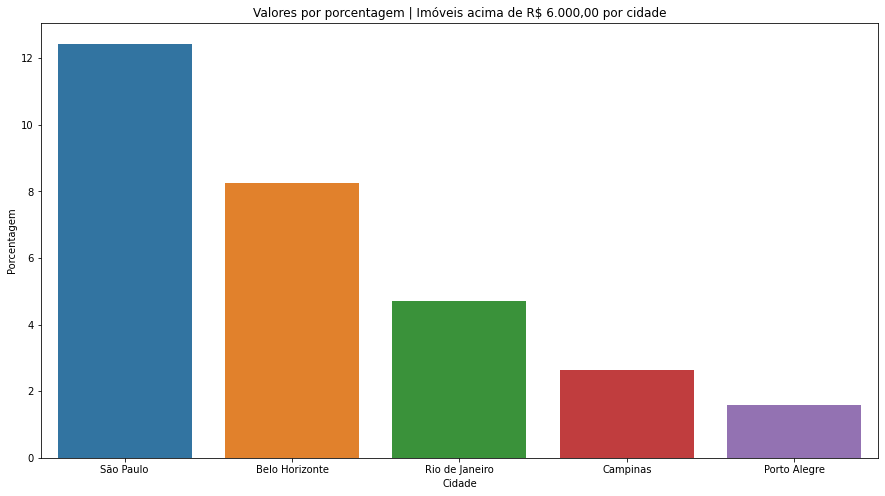

In [ ]:
plt.figure(figsize=(15, 8))

sns.barplot(data=tabela_maisCaros, y="Porcentagem (%)", x="city")
plt.title("Valores por porcentagem | Imóveis acima de R$ 6.000,00 por cidade")
plt.xlabel("Cidade")
plt.ylabel("Porcentagem"); 

## **Média de valores por área**

In [ ]:
df.head()

Retirando algumas Outliers para poder vizualisar o gráfico.

In [ ]:
df = df[df["area"] < 1900]

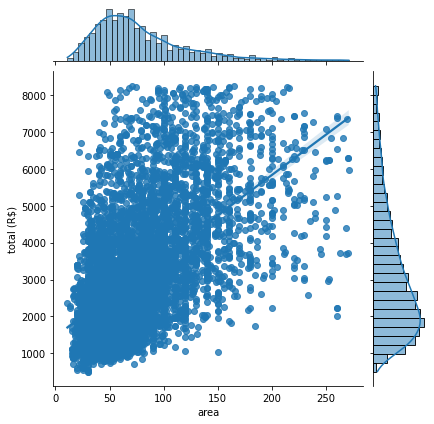

In [ ]:
sns.jointplot(x=df["area"], y=df["total (R$)"], kind="reg");

Criei um coluna de classes para colocar os valores em intervalos e facilitar a visualização:

In [ ]:
df["area"].max(), df["area"].min()

(271, 11)

In [ ]:
df["classes_area"] = pd.cut(x=df["area"], bins = 10, right=True)
area_total = df[["area","classes_area"]]
area_total

,area,classes_area
0,70,"(63.0, 89.0]"
2,80,"(63.0, 89.0]"
3,51,"(37.0, 63.0]"
4,25,"(10.74, 37.0]"
6,72,"(63.0, 89.0]"
...,...,...
10679,61,"(37.0, 63.0]"
10682,160,"(141.0, 167.0]"
10684,98,"(89.0, 115.0]"
10687,63,"(37.0, 63.0]"


In [ ]:
df["classes_area"].value_counts()

(37.0, 63.0]      2055
(63.0, 89.0]      1599
(89.0, 115.0]      917
(10.74, 37.0]      778
(115.0, 141.0]     503
(141.0, 167.0]     228
(167.0, 193.0]     127
(193.0, 219.0]      69
(219.0, 245.0]      45
(245.0, 271.0]      29
Name: classes_area, dtype: int64

Média dos valores dentro do intervalo de áreas:

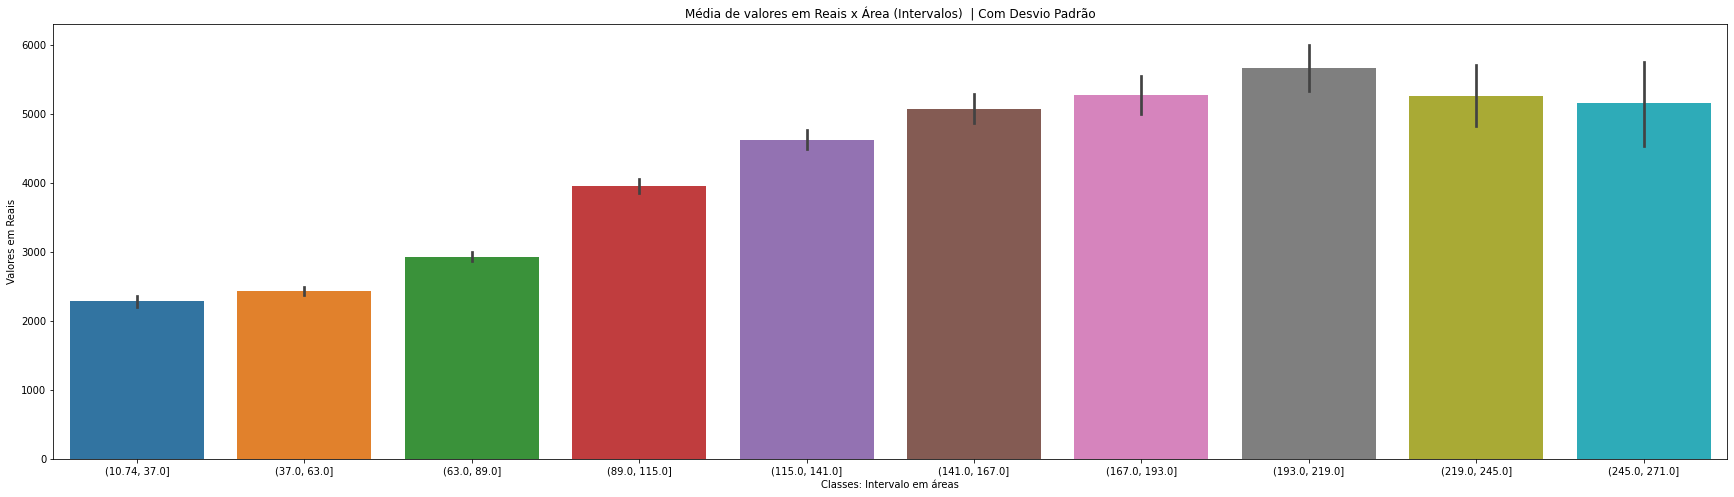

In [ ]:
plt.figure(figsize=(30, 8))
sns.barplot(data=df, x="classes_area", y="total (R$)", )
plt.title("Média de valores em Reais x Área (Intervalos)  | Com Desvio Padrão")
plt.xlabel("Classes: Intervalo em áreas")
plt.ylabel("Valores em Reais");

**Média dos valores considerando o número de quartos dentro do intervalo de área:**

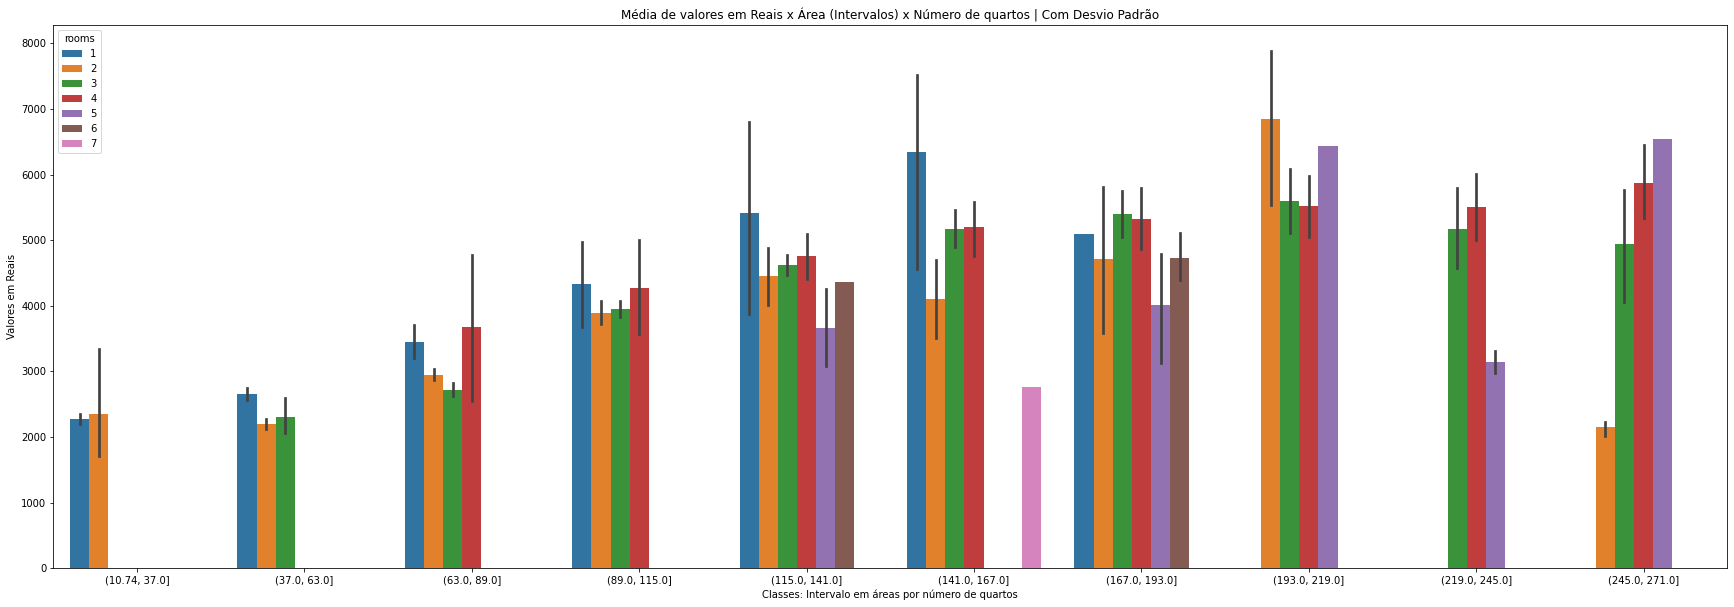

In [ ]:
plt.figure(figsize=(30, 10))
sns.barplot(data=df, x="classes_area", y="total (R$)", hue="rooms")
plt.title("Média de valores em Reais x Área (Intervalos) x Número de quartos | Com Desvio Padrão")
plt.xlabel("Classes: Intervalo em áreas por número de quartos")
plt.ylabel("Valores em Reais");

##**Qual imóvel tem o maior valor? E quais os seus dados?**


In [ ]:
city_area_total = df[["city", "area", "total (R$)"]]
city_area_total.sort_values(by="total (R$)", ascending=False)

,city,area,total (R$)
3346,Rio de Janeiro,71,8255
4653,São Paulo,165,8242
9112,São Paulo,130,8231
4192,São Paulo,115,8222
603,Campinas,214,8218
...,...,...,...
4868,Belo Horizonte,30,557
4294,Belo Horizonte,20,549
10218,Belo Horizonte,25,545
9317,Rio de Janeiro,30,507


**Imóvel mais caro fica no Rio de Janeiro com 71,00m² no 13º andar**




In [ ]:
df[df["total (R$)"] == 8255]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),classes_area
3346,Rio de Janeiro,71,2,2,1,13,not acept,furnished,2438,5500,246,71,8255,"(63.0, 89.0]"


##**Quais são as informações do imóvel de maior área que está para alugar?**



In [ ]:
maior_area = df["area"].max()
df[df["area"] == maior_area]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),classes_area
8355,Porto Alegre,271,4,3,1,7,acept,not furnished,1500,3900,500,57,5957,"(245.0, 271.0]"


##**Quanto custa o imóvel que fica no andar mais elevado?**



In [ ]:
mais_elevado = df["floor"].max()
df[df["floor"] == mais_elevado]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),classes_area
2562,Belo Horizonte,80,3,2,2,301,acept,not furnished,750,2600,164,35,3549,"(63.0, 89.0]"


In [ ]:
mais_caro = df[df["floor"] == mais_elevado]["total (R$)"]
mais_caro = pd.DataFrame(mais_caro)
mais_caro = mais_caro.reset_index()
mais_caro = mais_caro["total (R$)"][0]
print(f"R${mais_caro}")

R$3549


##**Os imóveis mobiliados tornam os aluguéis mais caros?**


**Veremos na tabela e gráfico abaixo:**

In [ ]:
floor_total_area = df[["furniture", "total (R$)"]]
floor_total_area.sort_values(by="total (R$)", ascending=False)

,furniture,total (R$)
3346,furnished,8255
4653,furnished,8242
9112,not furnished,8231
4192,furnished,8222
603,not furnished,8218
...,...,...
4868,not furnished,557
4294,not furnished,549
10218,not furnished,545
9317,not furnished,507


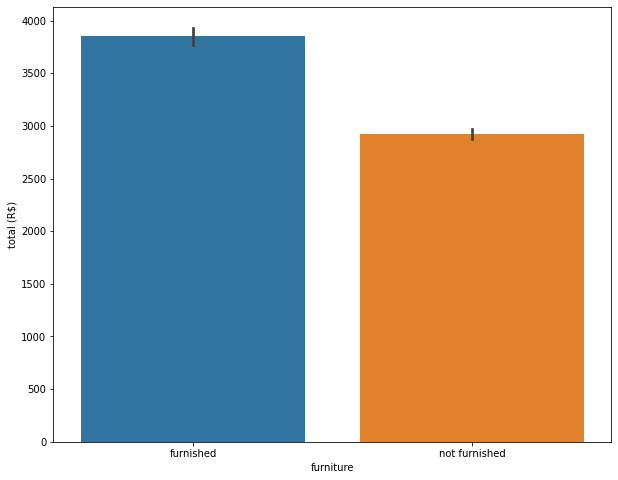

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="furniture", y="total (R$)");

Pela média geral percebe-se que o mobiliado é mais caro, vamos analisar pontualmente e pegar por área e posteriormente por andar:

Vamos primeiro analisar os imóveis por área:

In [ ]:
df_area_valorTotal = df[["furniture", "area", "total (R$)"]]
df_area_valorTotal.sort_values(by="total (R$)", ascending=False)

,furniture,area,total (R$)
3346,furnished,71,8255
4653,furnished,165,8242
9112,not furnished,130,8231
4192,furnished,115,8222
603,not furnished,214,8218
...,...,...,...
4868,not furnished,30,557
4294,not furnished,20,549
10218,not furnished,25,545
9317,not furnished,30,507


**Vemos abaixo que os imóveis mobiliados contém uma média maior no valor do aluguel com o aumento da área**. 

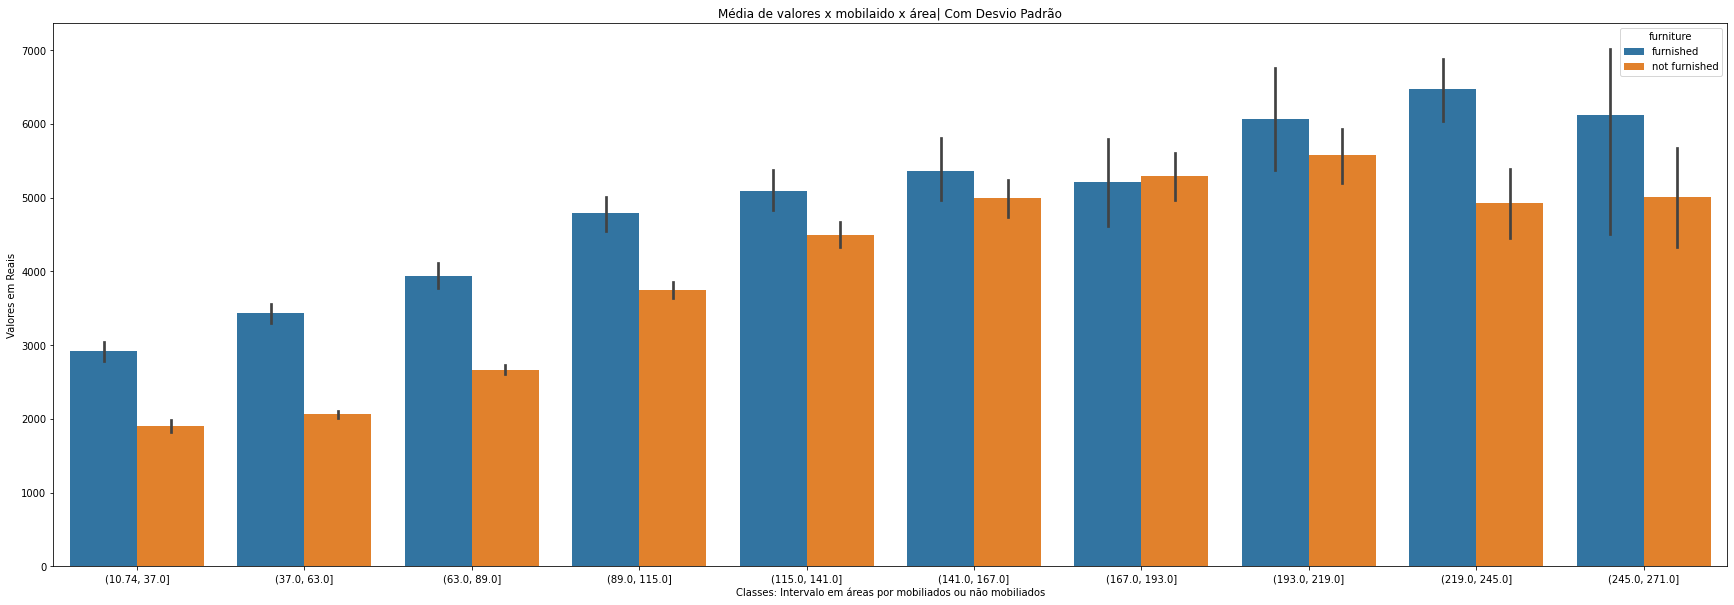

In [ ]:
plt.figure(figsize=(30, 10))
sns.barplot(data=df, x="classes_area", y="total (R$)", hue="furniture")
plt.title("Média de valores x mobilaido x área| Com Desvio Padrão")
plt.xlabel("Classes: Intervalo em áreas por mobiliados ou não mobiliados")
plt.ylabel("Valores em Reais");

**Vamos agora analisar por cada andar:**

In [ ]:
df_area_valorTotal = df[["furniture", "floor", "total (R$)"]]
df_area_valorTotal.sort_values(by="total (R$)", ascending=False)

,furniture,floor,total (R$)
3346,furnished,13,8255
4653,furnished,3,8242
9112,not furnished,8,8231
4192,furnished,1,8222
603,not furnished,1,8218
...,...,...,...
4868,not furnished,2,557
4294,not furnished,1,549
10218,not furnished,1,545
9317,not furnished,3,507


**Percebemos que independente do andar, o imóvel se torna mais caro sendo alugado mobiliado, vemos no gráfico abaixo:**

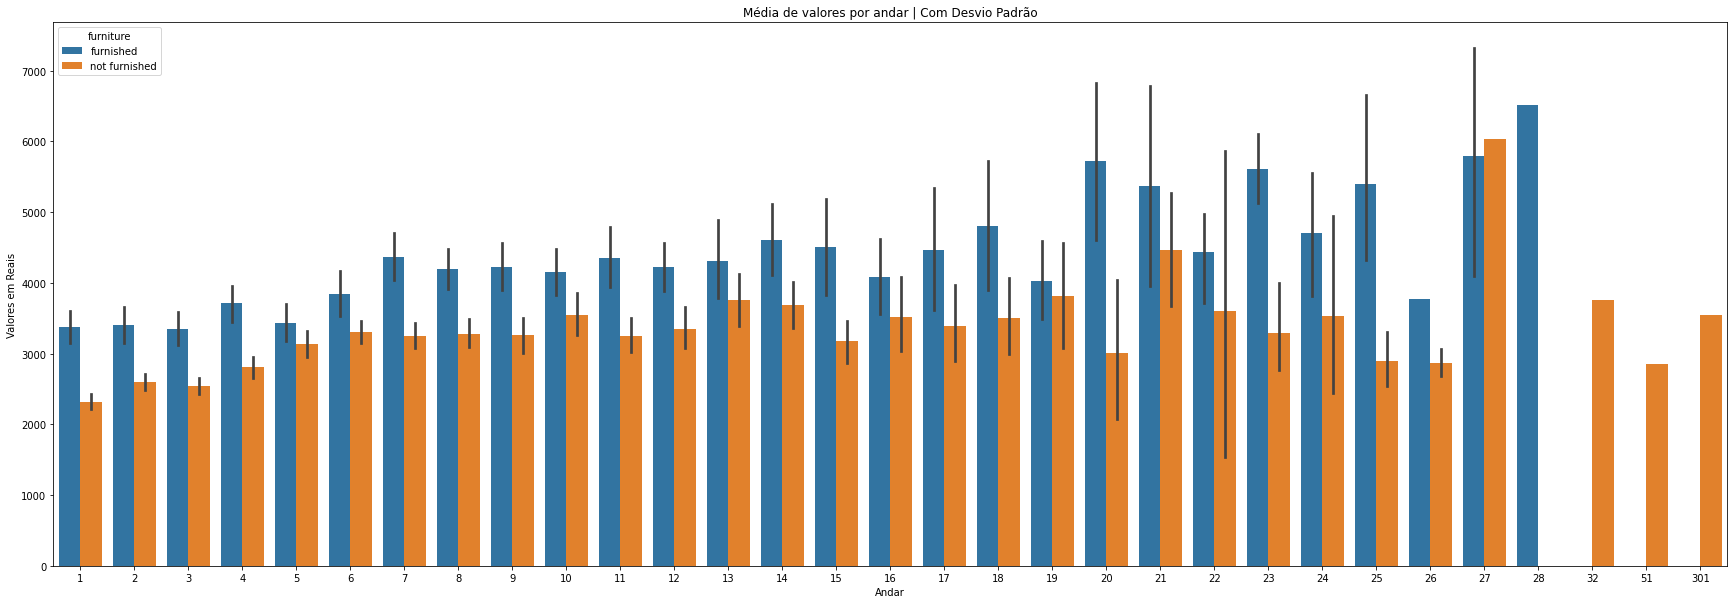

In [ ]:
plt.figure(figsize=(30, 10))
sns.barplot(data=df, x="floor", y="total (R$)", hue="furniture")
plt.title("Média de valores por andar | Com Desvio Padrão")
plt.xlabel("Andar")
plt.ylabel("Valores em Reais");

##**O valor do imóvel varia caso não aceite animais de estimação?**

In [ ]:
df_animal = df[["animal", "total (R$)"]]
df_animal = df_animal.sort_values(ascending=False, by="total (R$)")
df_animal

,animal,total (R$)
3346,not acept,8255
4653,acept,8242
9112,acept,8231
4192,acept,8222
603,acept,8218
...,...,...
4868,acept,557
4294,not acept,549
10218,not acept,545
9317,acept,507


**Percebe-se que o fato do imóvel aceitar ou não animais de estimação não influencia no valor do aluguel do mesmo:**

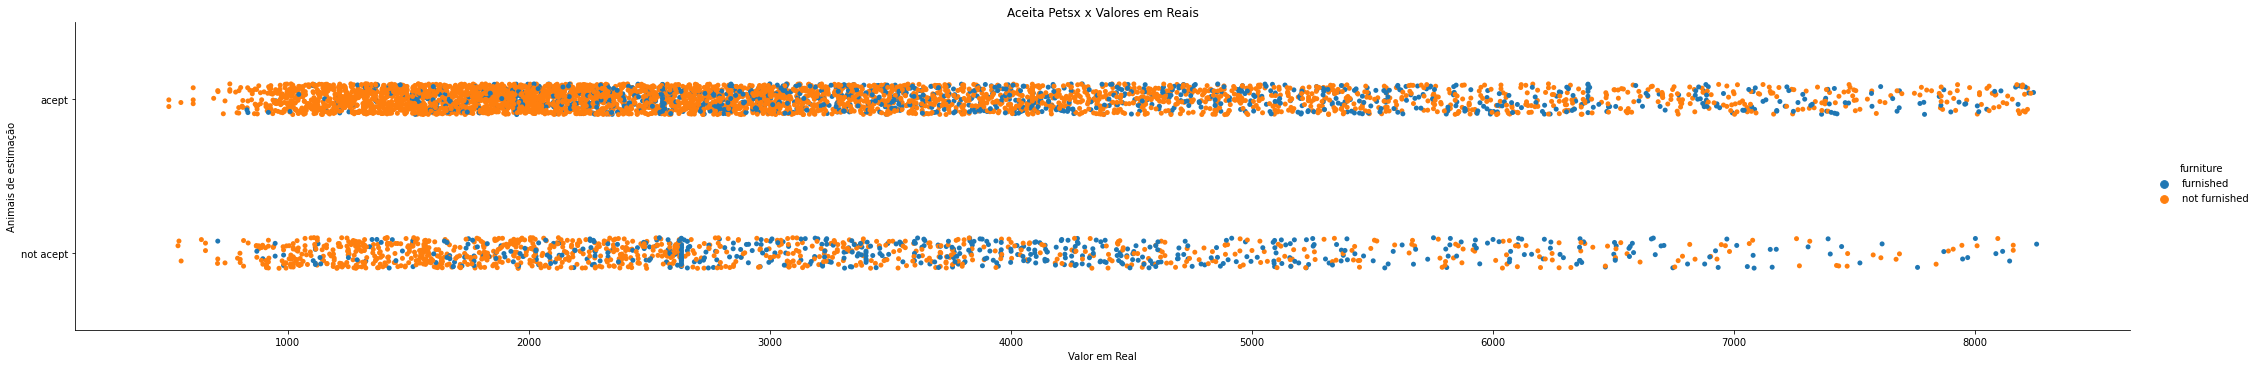

In [ ]:
sns.catplot(data=df, x="total (R$)", y="animal", hue="furniture", aspect=6, height=5)
plt.title("Aceita Petsx x Valores em Reais")
plt.xlabel("Valor em Real")
plt.ylabel("Animais de estimação");

##**Quais os andares dos imóveis que tenham 2 quartos e com menos de 100 m²?**

In [ ]:
area_menor_100m2 = df[df["area"] <100]
df_rooms2_100m = area_menor_100m2[df["rooms"] == 2]
df_rooms2_100m_u = df_rooms2_100m["floor"].unique()
df_rooms2_100m_u


array([ 7,  2,  9,  8, 11,  6, 13,  4, 20,  3, 14, 15,  1,  5, 16, 18, 10,
       17, 26, 12, 24, 19, 25, 21, 27, 51, 23, 22])

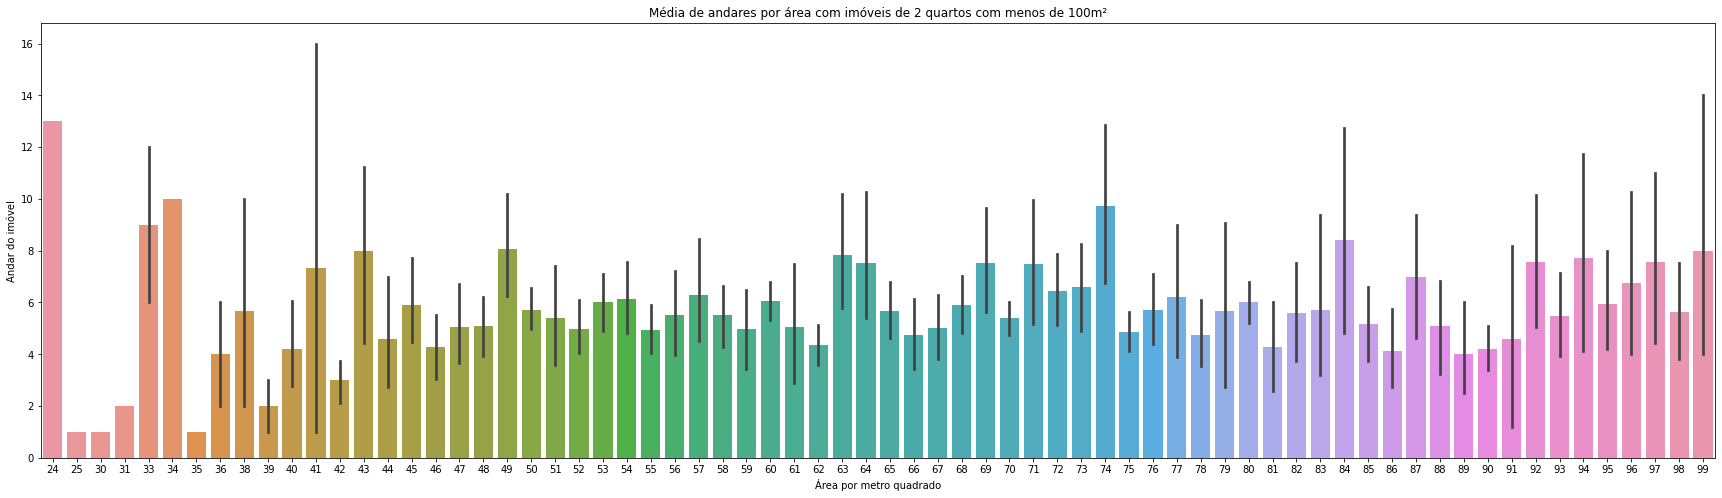

In [ ]:
plt.figure(figsize=(30,8))
sns.barplot(data=df_rooms2_100m, x="area", y="floor")
plt.title("Média de andares por área com imóveis de 2 quartos com menos de 100m²")
plt.xlabel("Área por metro quadrado")
plt.ylabel("Andar do imóvel");

## **Analisando as Taxas de Incêndio**

**Vamos primeiro pegar uma estatística básica com todas as cidades:**






Primeiro quartil: 18.0
Segundo quartil: 26.0
Terceiro quartil: 39.0
Intervalo interquartílico: 21.0
Limite superior: 70.5
Limite inferior: -13.5
Média geral: 30.19
Mediana: 26.00
Moda-Valor mais frequente: 16.00


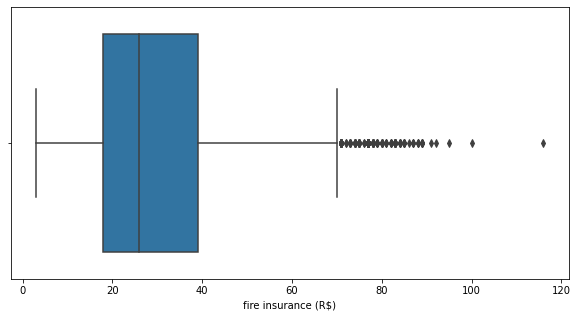

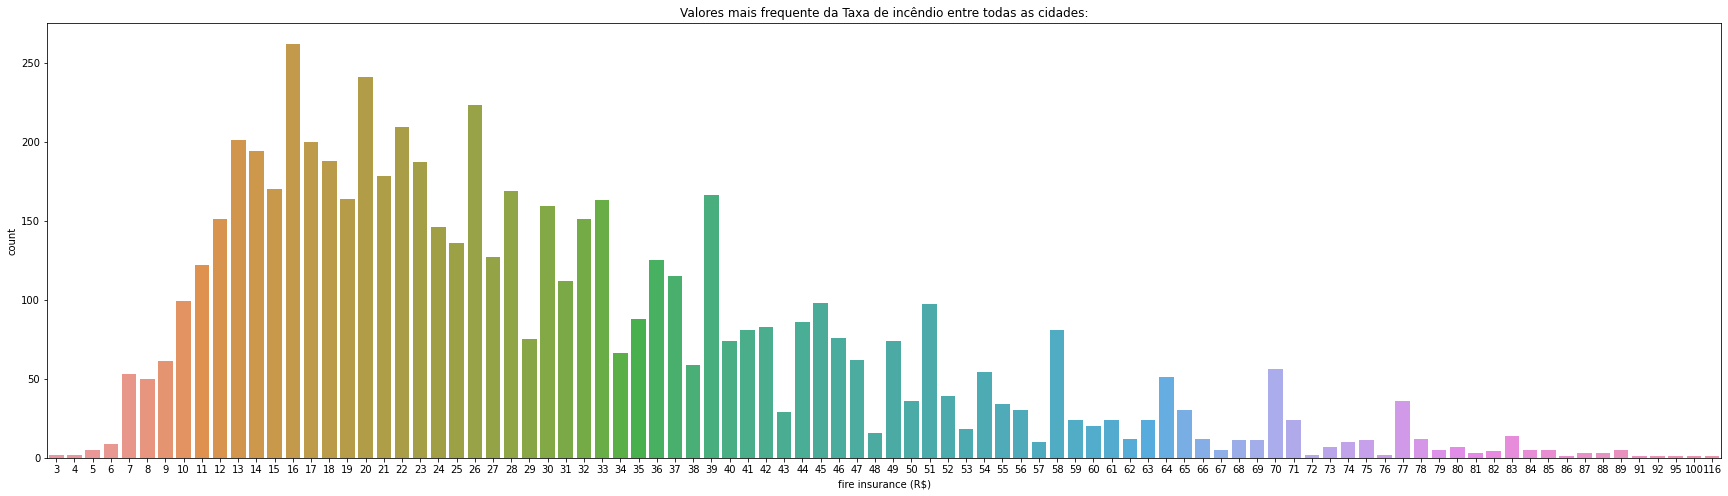

In [ ]:

plt.figure(figsize=(10,5))
sns.boxplot(x=df["fire insurance (R$)"]);

Q1 = df["fire insurance (R$)"].quantile(q=0.25) # Primeiro quartil
Q2 = df["fire insurance (R$)"].quantile(q=0.50) # Segundo quartil
Q3 = df["fire insurance (R$)"].quantile(q=0.75) # Terceiro quartil

IQR = Q3 - Q1 # Intervalo interquartílico
inf = Q1 - 1.5 * IQR
sup = Q3 + 1.5 * IQR
media = df["fire insurance (R$)"].mean()
mediana = df["fire insurance (R$)"].median()
moda = pd.DataFrame(df["fire insurance (R$)"].value_counts()).index[0]

print(f"Primeiro quartil: {Q1}")
print(f"Segundo quartil: {Q2}")
print(f"Terceiro quartil: {Q3}")
print(f"Intervalo interquartílico: {IQR}")
print(f"Limite superior: {sup}")
print(f"Limite inferior: {inf}")
print(f"Média geral: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda-Valor mais frequente: {moda:.2f}")

plt.figure(figsize=(30,8))
sns.countplot(df["fire insurance (R$)"])
plt.title("Valores mais frequente da Taxa de incêndio entre todas as cidades:");

**Agora vamos analisar uma estatística básica e os valores mais frequentes por cada cidade:**

In [ ]:
def cidades_taxas(cidade):
      cidade_incendio = df[df["city"] == cidade]
      print()
      plt.figure(figsize=(20,5))
      sns.boxplot(x=cidade_incendio["fire insurance (R$)"])
      plt.title(cidade);
      print()

      Q1 = cidade_incendio["fire insurance (R$)"].quantile(q=0.25) # Primeiro quartil
      Q2 = cidade_incendio["fire insurance (R$)"].quantile(q=0.50) # Segundo quartil
      Q3 = cidade_incendio["fire insurance (R$)"].quantile(q=0.75) # Terceiro quartil
      print()
      print("====================")
      print(f"Cidade de {cidade}")
      print("====================")
      IQR = Q3 - Q1 # Intervalo interquartílico
      inf = Q1 - 1.5 * IQR
      sup = Q3 + 1.5 * IQR
      media = cidade_incendio["fire insurance (R$)"].mean()
      mediana = cidade_incendio["fire insurance (R$)"].median()
      moda = pd.DataFrame(cidade_incendio["fire insurance (R$)"].value_counts()).index[0]

      print(f"Primeiro quartil: {Q1}")
      print(f"Segundo quartil: {Q2}")
      print(f"Terceiro quartil: {Q3}")
      print(f"Intervalo interquartílico: {IQR}")
      print(f"Limite superior: {sup}")
      print(f"Limite inferior: {inf}")
      print(f"Média geral: {media:.2f}")
      print(f"Mediana: {mediana:.2f}")
      print(f"Moda-Valor mais frequente: {moda:.2f}")
      print()
      plt.figure(figsize=(30,8))
      sns.countplot(cidade_incendio["fire insurance (R$)"])
      plt.title("Frequência dos valores da Taxa de Combate à Incêndio")
      print()

**São Paulo**




Cidade de São Paulo
Primeiro quartil: 22.0
Segundo quartil: 31.0
Terceiro quartil: 45.0
Intervalo interquartílico: 23.0
Limite superior: 79.5
Limite inferior: -12.5
Média geral: 34.73
Mediana: 31.00
Moda-Valor mais frequente: 26.00




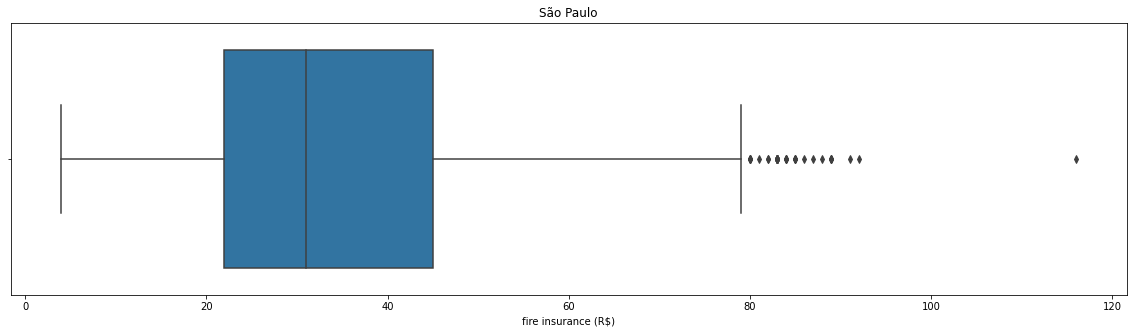

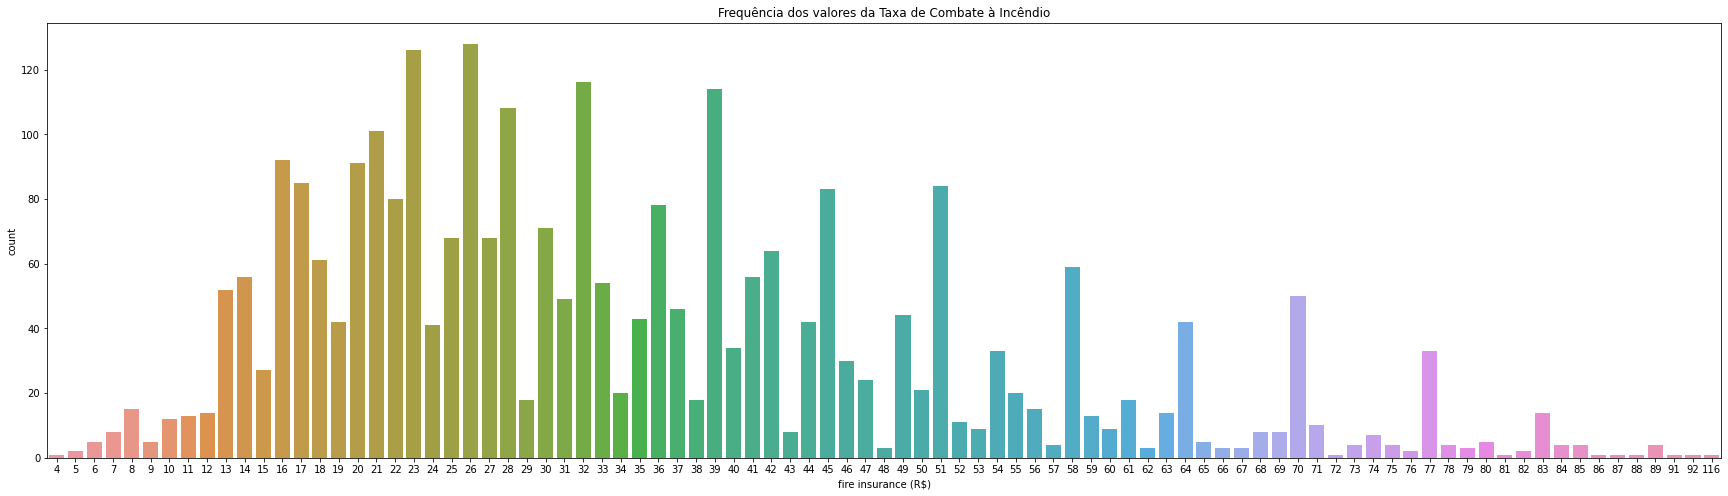

In [ ]:
cidades_taxas("São Paulo")

**Rio de Janeiro**




Cidade de Rio de Janeiro
Primeiro quartil: 18.0
Segundo quartil: 26.0
Terceiro quartil: 38.0
Intervalo interquartílico: 20.0
Limite superior: 68.0
Limite inferior: -12.0
Média geral: 29.97
Mediana: 26.00
Moda-Valor mais frequente: 16.00




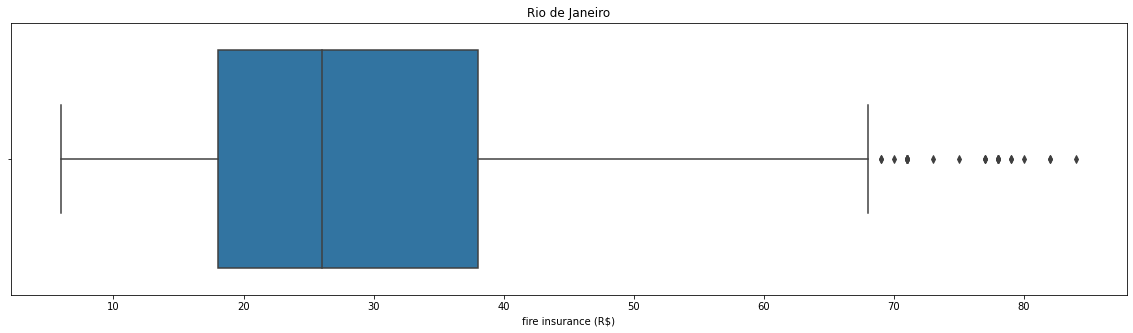

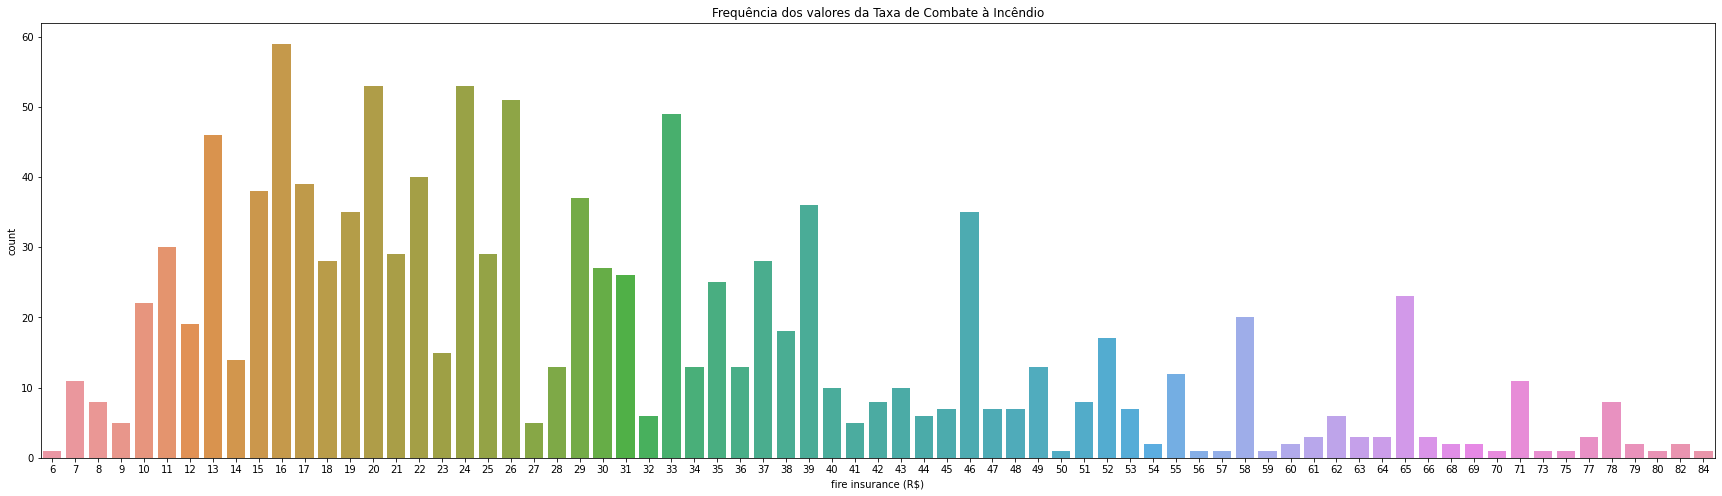

In [ ]:
cidades_taxas("Rio de Janeiro")

**Belo Horizonte**




Cidade de Belo Horizonte
Primeiro quartil: 15.0
Segundo quartil: 20.0
Terceiro quartil: 34.0
Intervalo interquartílico: 19.0
Limite superior: 62.5
Limite inferior: -13.5
Média geral: 26.10
Mediana: 20.00
Moda-Valor mais frequente: 12.00




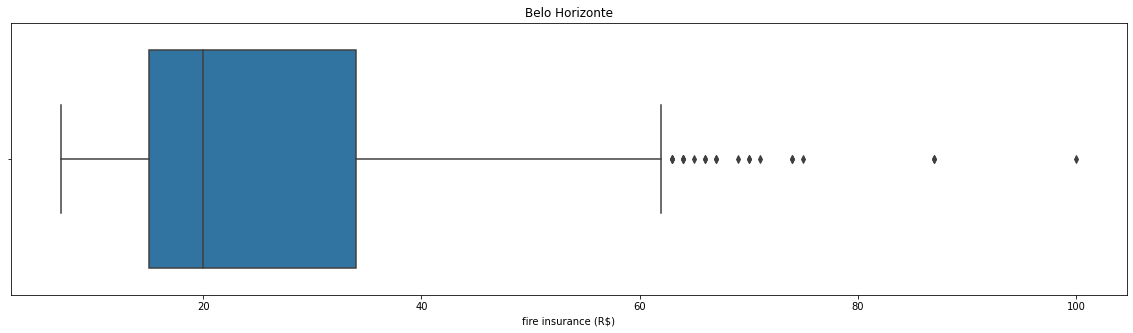

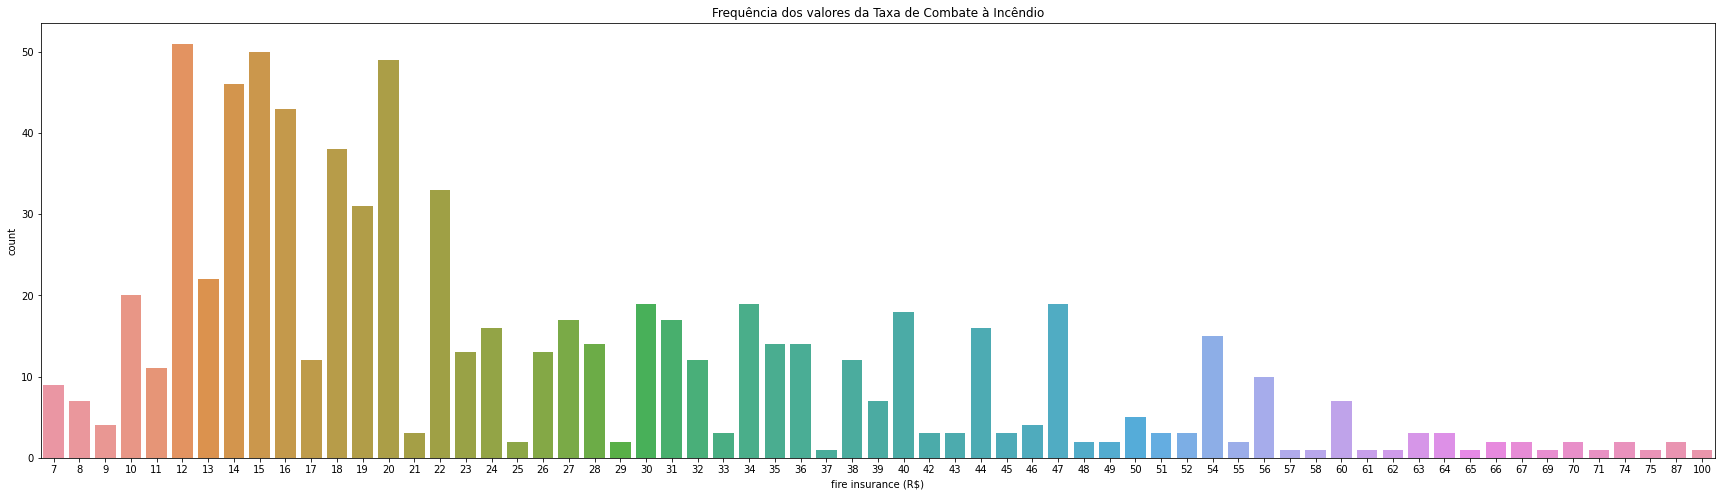

In [ ]:
cidades_taxas("Belo Horizonte")

**Porto Alegre**




Cidade de Porto Alegre
Primeiro quartil: 17.0
Segundo quartil: 22.0
Terceiro quartil: 33.0
Intervalo interquartílico: 16.0
Limite superior: 57.0
Limite inferior: -7.0
Média geral: 26.44
Mediana: 22.00
Moda-Valor mais frequente: 33.00




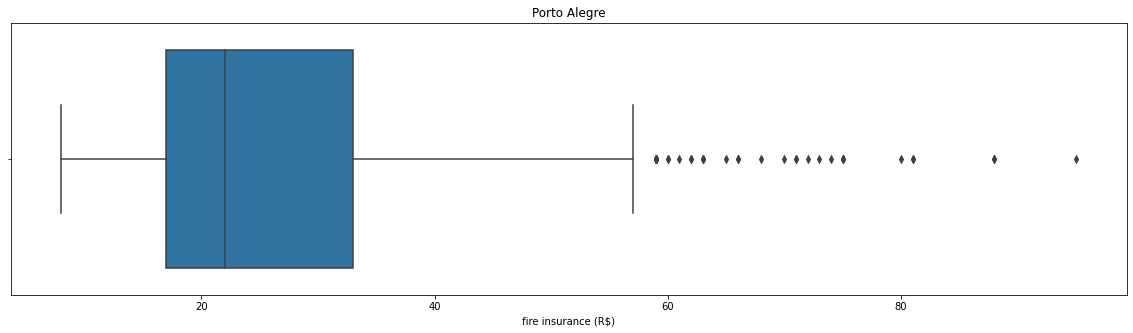

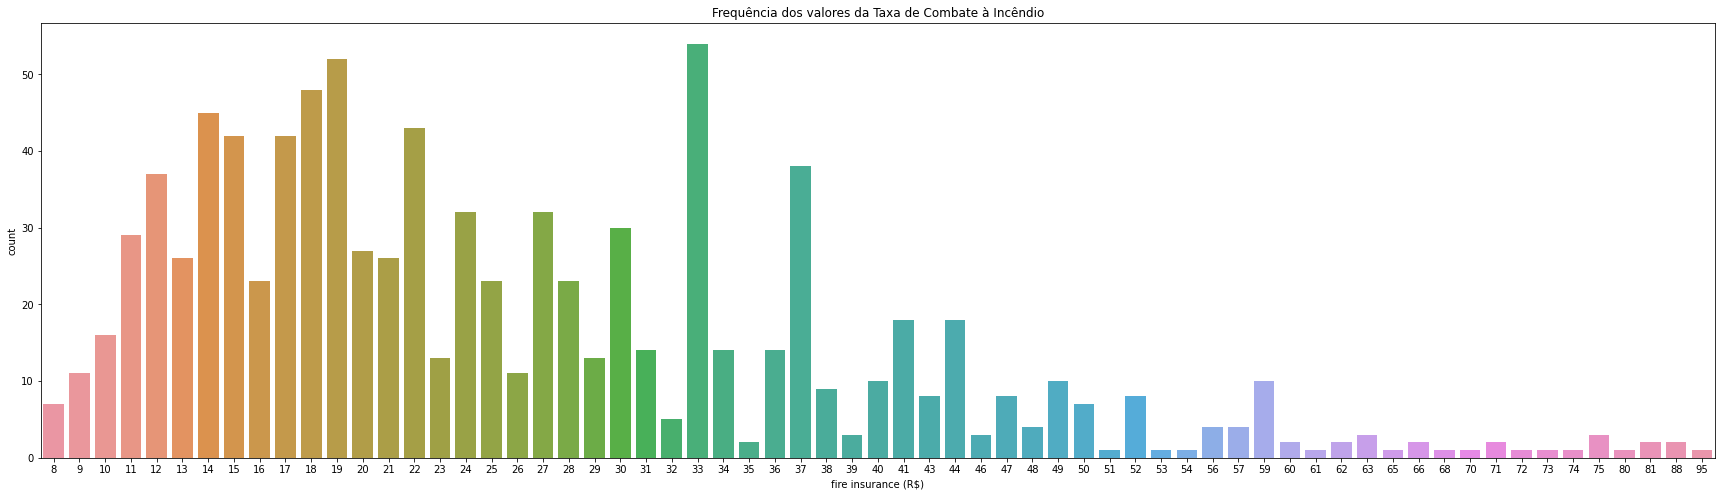

In [ ]:
cidades_taxas("Porto Alegre")

**Campinas**




Cidade de Campinas
Primeiro quartil: 12.0
Segundo quartil: 16.0
Terceiro quartil: 25.0
Intervalo interquartílico: 13.0
Limite superior: 44.5
Limite inferior: -7.5
Média geral: 20.29
Mediana: 16.00
Moda-Valor mais frequente: 13.00




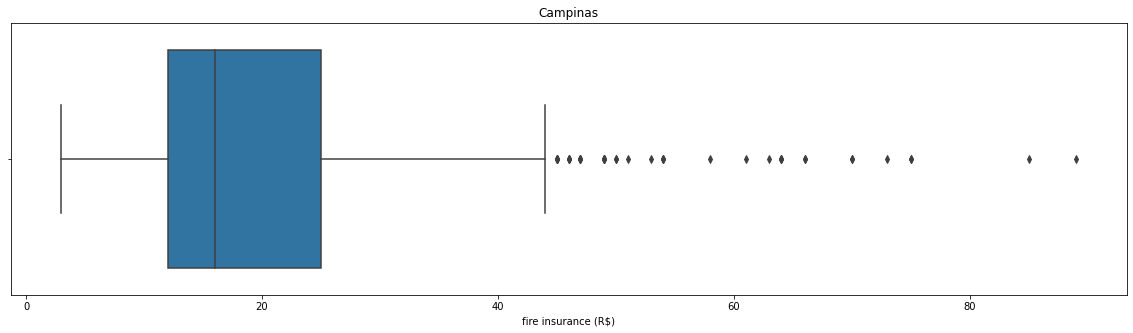

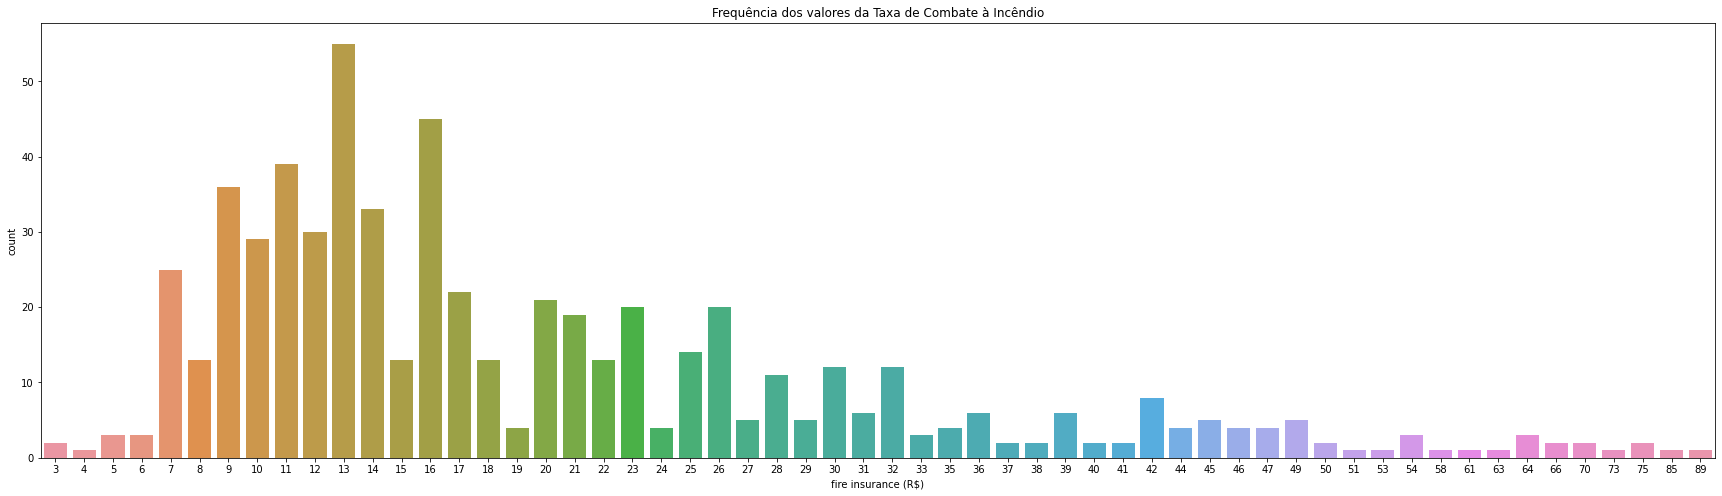

In [ ]:
cidades_taxas("Campinas")

##**Qual a cidade onde a média a taxa de seguro contra incêndio é mais cara? Os andares influenciam no valor final?**

In [ ]:
df_fogo_valor = df[["city", "floor", "fire insurance (R$)"]]
df_fogo_valor.sort_values(ascending=False, by="fire insurance (R$)")

,city,floor,fire insurance (R$)
1567,São Paulo,1,116
3526,Belo Horizonte,12,100
4163,Porto Alegre,6,95
4443,São Paulo,5,92
8106,São Paulo,11,91
...,...,...,...
6142,São Paulo,4,5
6376,São Paulo,4,4
8104,Campinas,3,4
9297,Campinas,7,3


**Média geral em cada cidade:**

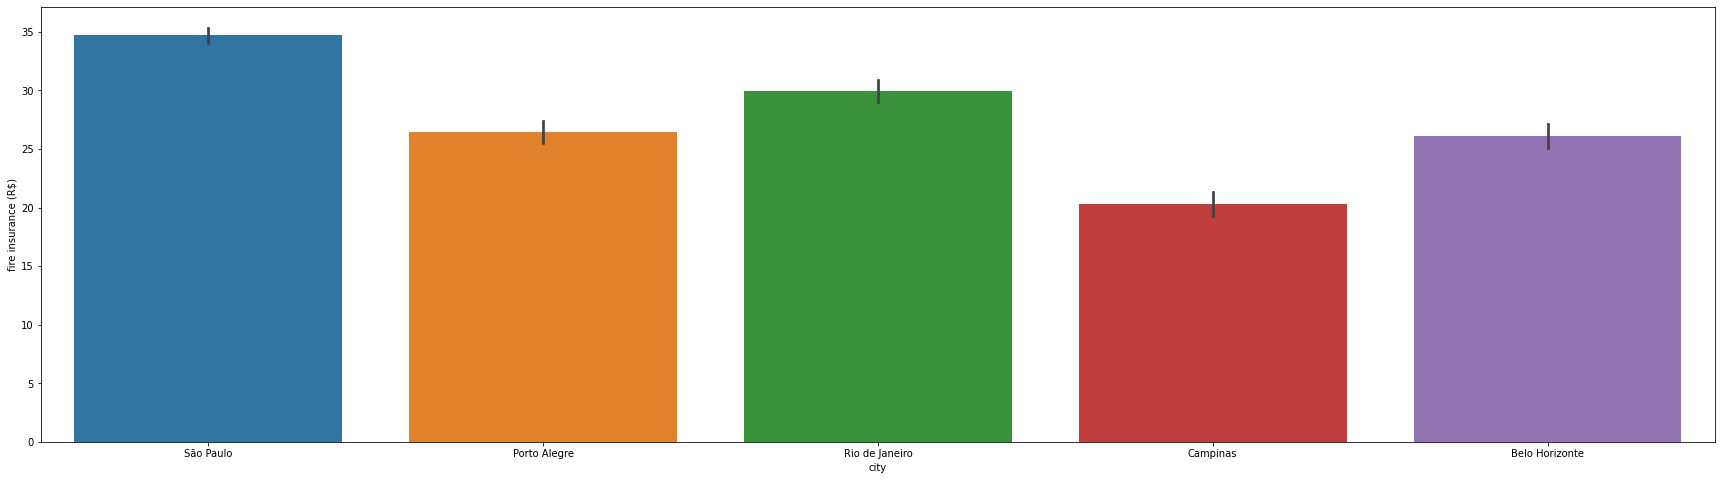

In [ ]:
plt.figure(figsize=(30,8))
sns.barplot(data=df_fogo_valor, x="city", y="fire insurance (R$)");

**Percebemos que há um certo crescimento nos taxas de combate à incêndio quando aumentamos a andar:**

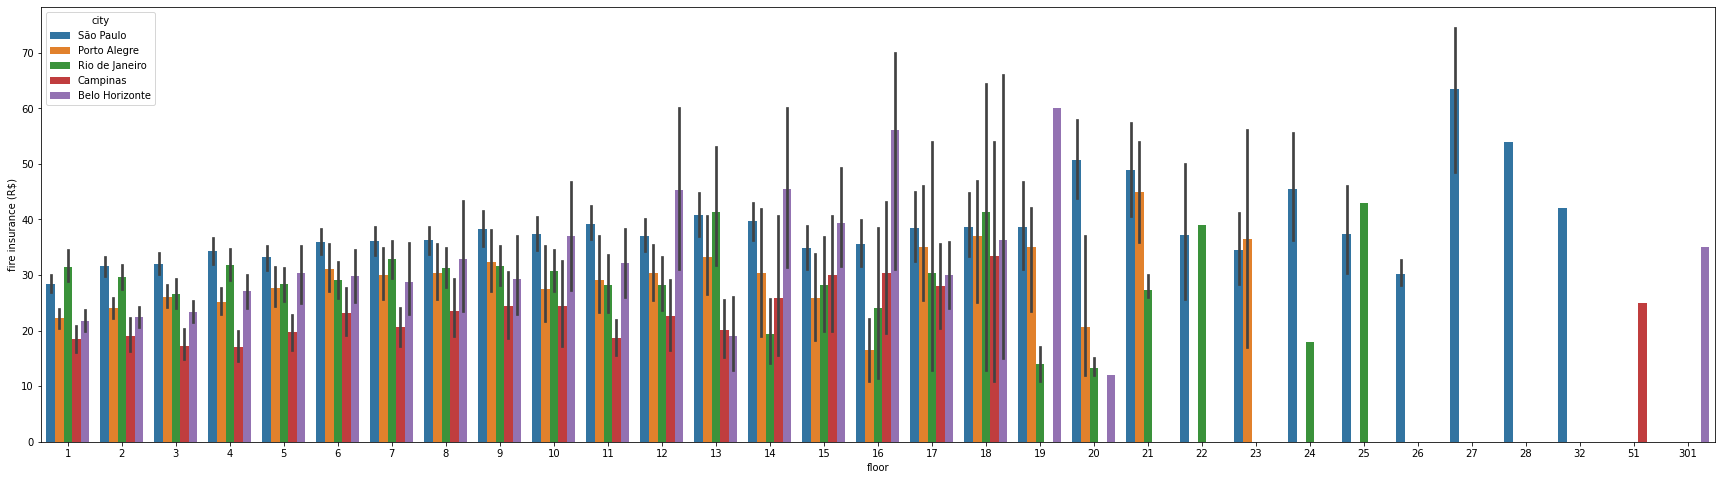

In [ ]:
plt.figure(figsize=(30,8))
sns.barplot(data=df_fogo_valor, x="floor", y="fire insurance (R$)", hue="city");

## **Qual a taxa de combate a incêndio do 301º andar?**

In [ ]:
df_301_incendio = pd.DataFrame(df[df["floor"]==301]["fire insurance (R$)"])
df_301_incendio = df_301_incendio.reset_index()
df_301_incendio = df_301_incendio["fire insurance (R$)"][0]
print(f"R$ {df_301_incendio},00")

R$ 35,00


##**A taxa de incêndio equivale a quanto no valor total do preço do aluguel? Qual a cidade tem a maior taxa?**

**No geral:**

In [ ]:
taxa = df["fire insurance (R$)"].sum()
total = df["total (R$)"].sum()
dif = (taxa/total)*100
print(f" Apenas {dif:.4f}%")

 Apenas 0.9576%


**Por cada cidade:**

In [ ]:
lista_cid = []
lista_taxa = []
lista_total = []
lista_porc = []
for cid in df["city"]:
  if cid not in lista_cid:
    lista_cid.append(cid)
    df_c = df[df["city"]==cid]
    taxa_c = df_c["fire insurance (R$)"].sum()
    lista_taxa.append(taxa_c)
    total_c = df_c["total (R$)"].sum()
    lista_total.append(total_c)
    dif_c = (taxa_c/total_c)*100
    lista_porc.append(dif_c)
tabela_taxa_porc = pd.DataFrame()
tabela_taxa_porc["cidade"] = lista_cid
tabela_taxa_porc["taxa de incêndio"] = lista_taxa
tabela_taxa_porc["Valor Total"] = lista_total
tabela_taxa_porc["Valor em %"] = lista_porc
tabela_taxa_porc
    

,cidade,taxa de incêndio,Valor Total,Valor em %
0,São Paulo,99183,10525681,0.942295
1,Porto Alegre,25010,2220006,1.126574
2,Rio de Janeiro,35271,3900568,0.904253
3,Campinas,12314,1395710,0.882275
4,Belo Horizonte,19939,1978902,1.007579


**Cidade com maior taxa:**

In [ ]:
maior_taxa = tabela_taxa_porc.sort_values(ascending=False, by="Valor em %")
maior_taxa = maior_taxa[["cidade", "Valor em %"]]
maior_taxa[:1]

,cidade,Valor em %
1,Porto Alegre,1.126574


##**Quantos apartamentos tem 3 vagas de garagem? Qual deles tem o maior preço,fica em qual andar e cidade?**

In [ ]:
df_3vagas = df[df["parking spaces"] == 3]
df_3vagas = df_3vagas.sort_values(ascending=False, by="total (R$)")
df_3vagas = df_3vagas[["city", "parking spaces", "floor", "total (R$)"]]
qto_df_3vagas = len(df_3vagas)
print(f"{qto_df_3vagas} imóveis com 3 vagas")
print("Imóveis com maior preço com seu andar e cidade:")
df_3vagas[:1]

176 imóveis com 3 vagas
Imóveis com maior preço com seu andar e cidade:


,city,parking spaces,floor,total (R$)
6154,São Paulo,3,1,8195
